<a href="https://colab.research.google.com/github/novus-afk/BikeSharingDemandRegression/blob/master/BikeSharingDemandPrediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Mohammed Yahya Ansari
##### **Team Member 2 -** Prafull Korde

# **Project Summary**

Write the summary here within 500-600 words.

# **GitHub Link**

https://github.com/novus-afk/BikeSharingDemandRegression

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt


# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor

from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

import xgboost as xgb


### Dataset Loading

In [2]:
# Load Dataset from github repository
url = 'https://raw.githubusercontent.com/novus-afk/BikeSharingDemandRegression/master/SeoulBikeData.csv'
data = pd.read_csv(url, encoding='unicode_escape')

### Dataset First View

In [3]:
# View top 5 rows of the dataset
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [4]:
# View last 5 rows of the dataset
data.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [5]:
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",data.shape[0])
print("Number of columns are: ",data.shape[1])

Number of rows are:  8760
Number of columns are:  14


### Dataset Information

In [6]:
# Checking information about the dataset using info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [7]:
# Checking duplicated rows count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Checking missing values/null values count for each column
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

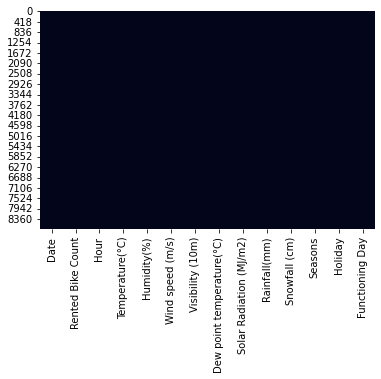

In [9]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(data.isnull(), cbar=False)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Dataset Describe (all columns included)
data.describe(include= 'all').round(2)

Date  Rented Bike Count     Hour  Temperature(°C)  Humidity(%)  \
count         8760            8760.00  8760.00          8760.00      8760.00   
unique         365                NaN      NaN              NaN          NaN   
top     01/12/2017                NaN      NaN              NaN          NaN   
freq            24                NaN      NaN              NaN          NaN   
mean           NaN             704.60    11.50            12.88        58.23   
std            NaN             645.00     6.92            11.94        20.36   
min            NaN               0.00     0.00           -17.80         0.00   
25%            NaN             191.00     5.75             3.50        42.00   
50%            NaN             504.50    11.50            13.70        57.00   
75%            NaN            1065.25    17.25            22.50        74.00   
max            NaN            3556.00    23.00            39.40        98.00   

        Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count            8760.00           8760.00                    8760.00   
unique               NaN               NaN                        NaN   
top                  NaN               NaN                        NaN   
freq                 NaN               NaN                        NaN   
mean                1.72           1436.83                       4.07   
std                 1.04            608.30                      13.06   
min                 0.00             27.00                     -30.60   
25%                 0.90            940.00                      -4.70   
50%                 1.50           1698.00                       5.10   
75%                 2.30           2000.00                      14.80   
max                 7.40           2000.00                      27.20   

        Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
count                   8760.00       8760.00        8760.00    8760   
unique                      NaN           NaN            NaN       4   
top                         NaN           NaN            NaN  Spring   
freq                        NaN           NaN            NaN    2208   
mean                       0.57          0.15           0.08     NaN   
std                        0.87          1.13           0.44     NaN   
min                        0.00          0.00           0.00     NaN   
25%                        0.00          0.00           0.00     NaN   
50%                        0.01          0.00           0.00     NaN   
75%                        0.93          0.00           0.00     NaN   
max                        3.52         35.00           8.80     NaN   

           Holiday Functioning Day  
count         8760            8760  
unique           2               2  
top     No Holiday             Yes  
freq          8328            8465  
mean           NaN             NaN  
std            NaN             NaN  
min            NaN             NaN  
25%            NaN             NaN  
50%            NaN             NaN  
75%            NaN             NaN  
max            NaN             NaN

### Variables Description 

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


<b>Attribute Information: </b>

* Date : year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of he day
* Temperature-Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable using a for loop
for i in data.columns.tolist():
  print("No. of unique values in",i,"is",data[i].nunique())

No. of unique values in Date is 365
No. of unique values in Rented Bike Count is 2166
No. of unique values in Hour is 24
No. of unique values in Temperature(°C) is 546
No. of unique values in Humidity(%) is 90
No. of unique values in Wind speed (m/s) is 65
No. of unique values in Visibility (10m) is 1789
No. of unique values in Dew point temperature(°C) is 556
No. of unique values in Solar Radiation (MJ/m2) is 345
No. of unique values in Rainfall(mm) is 61
No. of unique values in Snowfall (cm) is 51
No. of unique values in Seasons is 4
No. of unique values in Holiday is 2
No. of unique values in Functioning Day is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.

In [14]:
# Before doing any data wrangling lets create copy of the dataset
data_2 = data.copy()

In [15]:
# Renaming the columns
data_2.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temperature', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'},
          inplace=True)

In [16]:
data_2.columns

Index(['date', 'rented_bike_count', 'hour', 'temperature', 'humidity',
       'wind_speed', 'visibility', 'dew_point_temp', 'solar_radiation',
       'rainfall', 'snowfall', 'seasons', 'holiday', 'func_day'],
      dtype='object')

In [17]:
# converting date variable in to datetime datatype
data_2['date'] = data_2['date'].apply(lambda x: dt.strptime(x,'%d/%m/%Y'))

In [18]:
# Creating new columns for day and month

data_2['month'] = data_2['date'].apply(lambda x : x.month)
data_2['day_of_week'] = data_2['date'].apply(lambda x : x.isoweekday())

In [19]:
data_2.tail(15)

date  rented_bike_count  hour  temperature  humidity  wind_speed  \
8745 2018-11-30                809     9         -0.4        57         0.6   
8746 2018-11-30                554    10          1.9        51         0.8   
8747 2018-11-30                642    11          5.3        43         1.8   
8748 2018-11-30                720    12          6.6        35         1.3   
8749 2018-11-30                740    13          7.1        24         2.8   
8750 2018-11-30                761    14          7.8        20         2.2   
8751 2018-11-30                768    15          7.0        20         3.3   
8752 2018-11-30                837    16          7.2        23         1.5   
8753 2018-11-30               1047    17          6.0        29         2.1   
8754 2018-11-30               1384    18          4.7        34         1.9   
8755 2018-11-30               1003    19          4.2        34         2.6   
8756 2018-11-30                764    20          3.4        37         2.3   
8757 2018-11-30                694    21          2.6        39         0.3   
8758 2018-11-30                712    22          2.1        41         1.0   
8759 2018-11-30                584    23          1.9        43         1.3   

      visibility  dew_point_temp  solar_radiation  rainfall  snowfall seasons  \
8745        1270            -7.8             0.45       0.0       0.0  Autumn   
8746        1029            -7.1             1.01       0.0       0.0  Autumn   
8747        1177            -6.2             1.38       0.0       0.0  Autumn   
8748        1409            -7.8             1.70       0.0       0.0  Autumn   
8749        1838           -12.1             1.83       0.0       0.0  Autumn   
8750        2000           -13.8             1.67       0.0       0.0  Autumn   
8751        1994           -14.4             1.21       0.0       0.0  Autumn   
8752        1945           -12.6             0.72       0.0       0.0  Autumn   
8753        1877           -10.7             0.23       0.0       0.0  Autumn   
8754        1661            -9.8             0.00       0.0       0.0  Autumn   
8755        1894           -10.3             0.00       0.0       0.0  Autumn   
8756        2000            -9.9             0.00       0.0       0.0  Autumn   
8757        1968            -9.9             0.00       0.0       0.0  Autumn   
8758        1859            -9.8             0.00       0.0       0.0  Autumn   
8759        1909            -9.3             0.00       0.0       0.0  Autumn   

         holiday func_day  month  day_of_week  
8745  No Holiday      Yes     11            5  
8746  No Holiday      Yes     11            5  
8747  No Holiday      Yes     11            5  
8748  No Holiday      Yes     11            5  
8749  No Holiday      Yes     11            5  
8750  No Holiday      Yes     11            5  
8751  No Holiday      Yes     11            5  
8752  No Holiday      Yes     11            5  
8753  No Holiday      Yes     11            5  
8754  No Holiday      Yes     11            5  
8755  No Holiday      Yes     11            5  
8756  No Holiday      Yes     11            5  
8757  No Holiday      Yes     11            5  
8758  No Holiday      Yes     11            5  
8759  No Holiday      Yes     11            5

In [20]:
data_2.describe(include='all')

date  rented_bike_count         hour  temperature  \
count                  8760        8760.000000  8760.000000  8760.000000   
unique                  365                NaN          NaN          NaN   
top     2017-12-01 00:00:00                NaN          NaN          NaN   
freq                     24                NaN          NaN          NaN   
first   2017-12-01 00:00:00                NaN          NaN          NaN   
last    2018-11-30 00:00:00                NaN          NaN          NaN   
mean                    NaN         704.602055    11.500000    12.882922   
std                     NaN         644.997468     6.922582    11.944825   
min                     NaN           0.000000     0.000000   -17.800000   
25%                     NaN         191.000000     5.750000     3.500000   
50%                     NaN         504.500000    11.500000    13.700000   
75%                     NaN        1065.250000    17.250000    22.500000   
max                     NaN        3556.000000    23.000000    39.400000   

           humidity   wind_speed   visibility  dew_point_temp  \
count   8760.000000  8760.000000  8760.000000     8760.000000   
unique          NaN          NaN          NaN             NaN   
top             NaN          NaN          NaN             NaN   
freq            NaN          NaN          NaN             NaN   
first           NaN          NaN          NaN             NaN   
last            NaN          NaN          NaN             NaN   
mean      58.226256     1.724909  1436.825799        4.073813   
std       20.362413     1.036300   608.298712       13.060369   
min        0.000000     0.000000    27.000000      -30.600000   
25%       42.000000     0.900000   940.000000       -4.700000   
50%       57.000000     1.500000  1698.000000        5.100000   
75%       74.000000     2.300000  2000.000000       14.800000   
max       98.000000     7.400000  2000.000000       27.200000   

        solar_radiation     rainfall     snowfall seasons     holiday  \
count       8760.000000  8760.000000  8760.000000    8760        8760   
unique              NaN          NaN          NaN       4           2   
top                 NaN          NaN          NaN  Spring  No Holiday   
freq                NaN          NaN          NaN    2208        8328   
first               NaN          NaN          NaN     NaN         NaN   
last                NaN          NaN          NaN     NaN         NaN   
mean           0.569111     0.148687     0.075068     NaN         NaN   
std            0.868746     1.128193     0.436746     NaN         NaN   
min            0.000000     0.000000     0.000000     NaN         NaN   
25%            0.000000     0.000000     0.000000     NaN         NaN   
50%            0.010000     0.000000     0.000000     NaN         NaN   
75%            0.930000     0.000000     0.000000     NaN         NaN   
max            3.520000    35.000000     8.800000     NaN         NaN   

       func_day        month  day_of_week  
count      8760  8760.000000  8760.000000  
unique        2          NaN          NaN  
top         Yes          NaN          NaN  
freq       8465          NaN          NaN  
first       NaN          NaN          NaN  
last        NaN          NaN          NaN  
mean        NaN     6.526027     4.002740  
std         NaN     3.448048     1.998056  
min         NaN     1.000000     1.000000  
25%         NaN     4.000000     2.000000  
50%         NaN     7.000000     4.000000  
75%         NaN    10.000000     6.000000  
max         NaN    12.000000     7.000000

In [21]:
# engineering new feature 'weekend' from day_of_week
data_2['weekend'] = data_2['day_of_week'].apply(lambda x: 1 if x>5 else 0)

In [22]:
data_2.describe(include='all')

date  rented_bike_count         hour  temperature  \
count                  8760        8760.000000  8760.000000  8760.000000   
unique                  365                NaN          NaN          NaN   
top     2017-12-01 00:00:00                NaN          NaN          NaN   
freq                     24                NaN          NaN          NaN   
first   2017-12-01 00:00:00                NaN          NaN          NaN   
last    2018-11-30 00:00:00                NaN          NaN          NaN   
mean                    NaN         704.602055    11.500000    12.882922   
std                     NaN         644.997468     6.922582    11.944825   
min                     NaN           0.000000     0.000000   -17.800000   
25%                     NaN         191.000000     5.750000     3.500000   
50%                     NaN         504.500000    11.500000    13.700000   
75%                     NaN        1065.250000    17.250000    22.500000   
max                     NaN        3556.000000    23.000000    39.400000   

           humidity   wind_speed   visibility  dew_point_temp  \
count   8760.000000  8760.000000  8760.000000     8760.000000   
unique          NaN          NaN          NaN             NaN   
top             NaN          NaN          NaN             NaN   
freq            NaN          NaN          NaN             NaN   
first           NaN          NaN          NaN             NaN   
last            NaN          NaN          NaN             NaN   
mean      58.226256     1.724909  1436.825799        4.073813   
std       20.362413     1.036300   608.298712       13.060369   
min        0.000000     0.000000    27.000000      -30.600000   
25%       42.000000     0.900000   940.000000       -4.700000   
50%       57.000000     1.500000  1698.000000        5.100000   
75%       74.000000     2.300000  2000.000000       14.800000   
max       98.000000     7.400000  2000.000000       27.200000   

        solar_radiation     rainfall     snowfall seasons     holiday  \
count       8760.000000  8760.000000  8760.000000    8760        8760   
unique              NaN          NaN          NaN       4           2   
top                 NaN          NaN          NaN  Spring  No Holiday   
freq                NaN          NaN          NaN    2208        8328   
first               NaN          NaN          NaN     NaN         NaN   
last                NaN          NaN          NaN     NaN         NaN   
mean           0.569111     0.148687     0.075068     NaN         NaN   
std            0.868746     1.128193     0.436746     NaN         NaN   
min            0.000000     0.000000     0.000000     NaN         NaN   
25%            0.000000     0.000000     0.000000     NaN         NaN   
50%            0.010000     0.000000     0.000000     NaN         NaN   
75%            0.930000     0.000000     0.000000     NaN         NaN   
max            3.520000    35.000000     8.800000     NaN         NaN   

       func_day        month  day_of_week      weekend  
count      8760  8760.000000  8760.000000  8760.000000  
unique        2          NaN          NaN          NaN  
top         Yes          NaN          NaN          NaN  
freq       8465          NaN          NaN          NaN  
first       NaN          NaN          NaN          NaN  
last        NaN          NaN          NaN          NaN  
mean        NaN     6.526027     4.002740     0.284932  
std         NaN     3.448048     1.998056     0.451408  
min         NaN     1.000000     1.000000     0.000000  
25%         NaN     4.000000     2.000000     0.000000  
50%         NaN     7.000000     4.000000     0.000000  
75%         NaN    10.000000     6.000000     1.000000  
max         NaN    12.000000     7.000000     1.000000

In [23]:
# defining continuous independent variables separately
cont_var = ['temperature', 'humidity', 'wind_speed', 'visibility', 'solar_radiation', 'rainfall', 'snowfall']

In [24]:
# Defining dependent variable
dependent_variable = ['rented_bike_count']

In [25]:
# defining categorical independent variables separately
cat_var = ['hour','seasons', 'holiday', 'func_day', 'month', 'day_of_week', 'weekend']

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

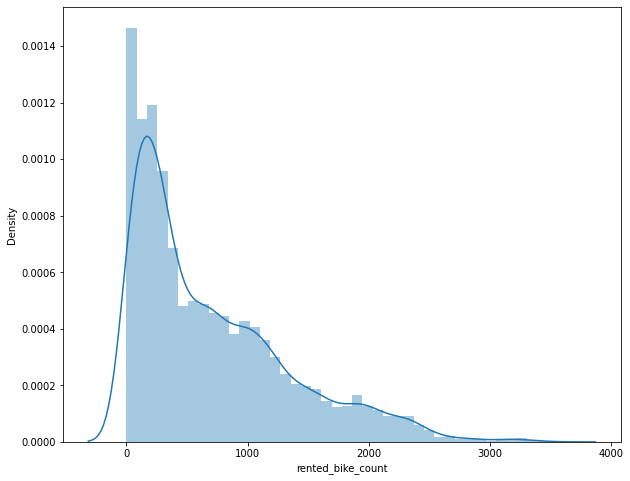

In [26]:
# Chart-1 Visualization code for distribution of target variable
plt.figure(figsize=(10,8))
sns.distplot(data_2['rented_bike_count'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

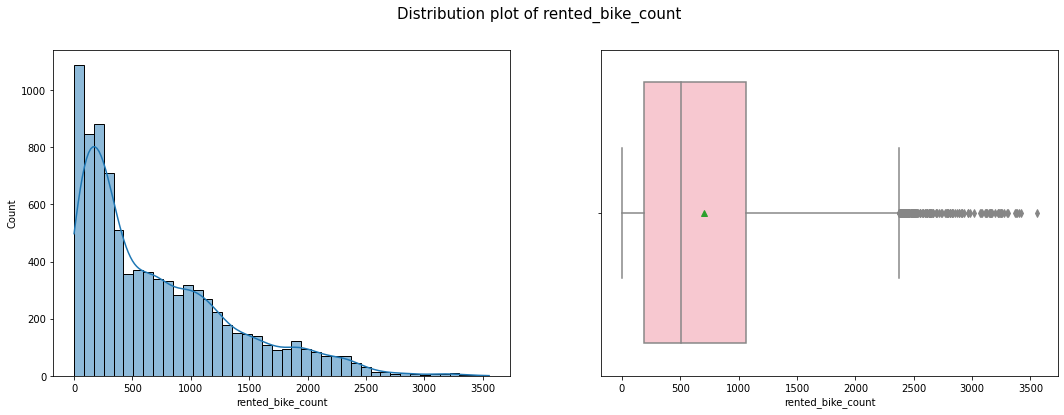

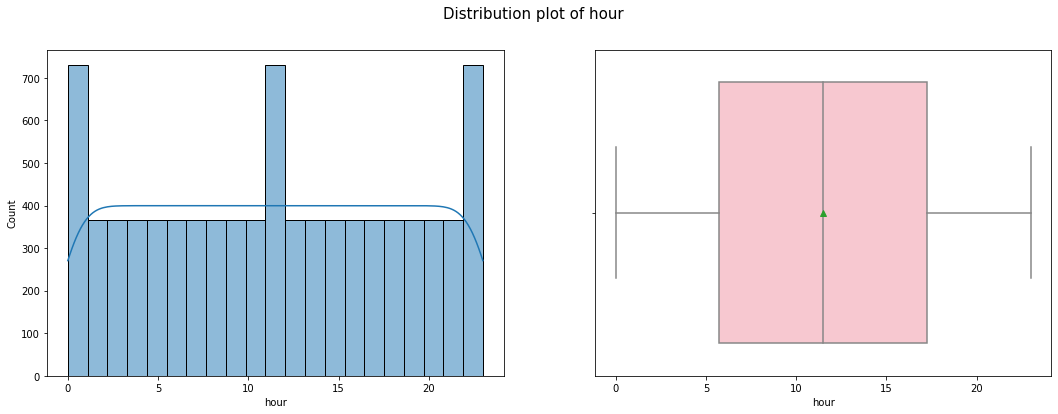

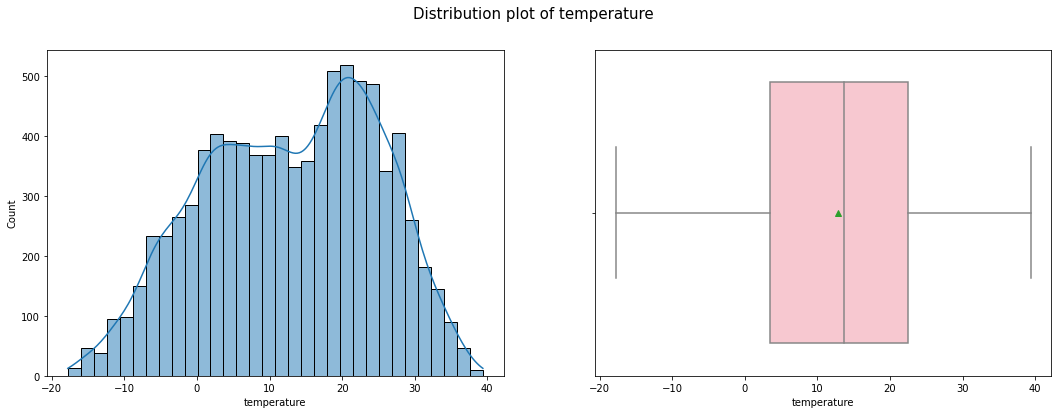

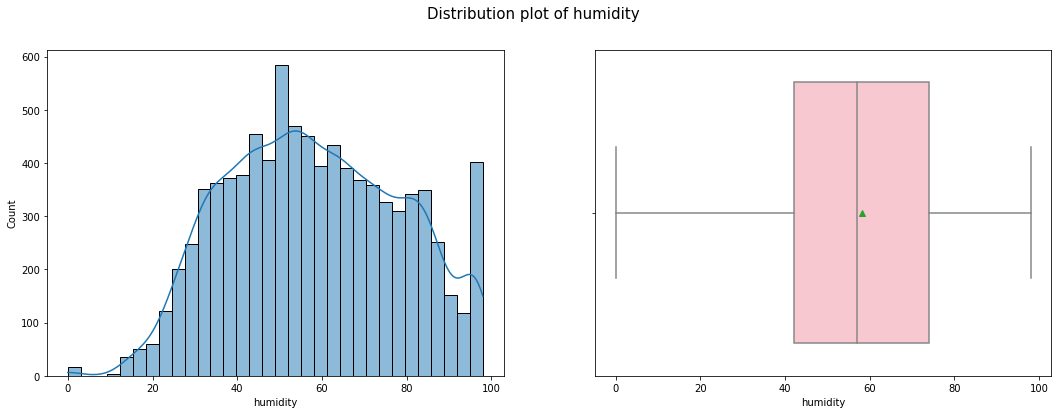

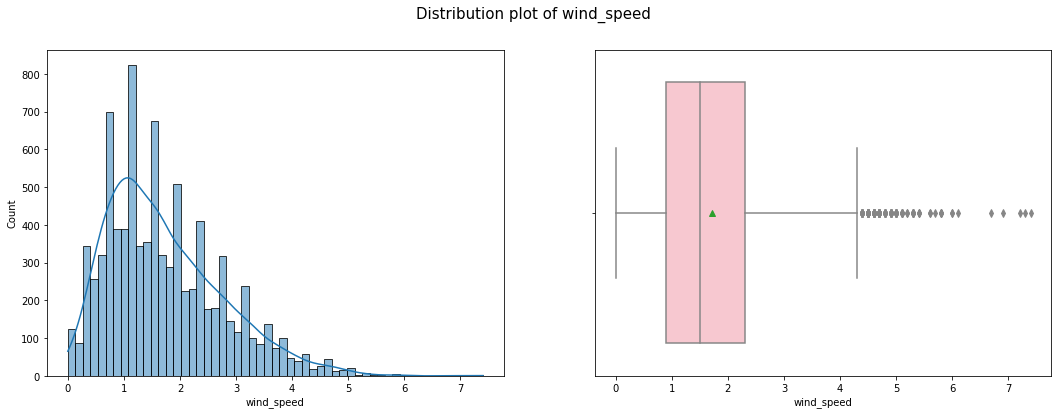

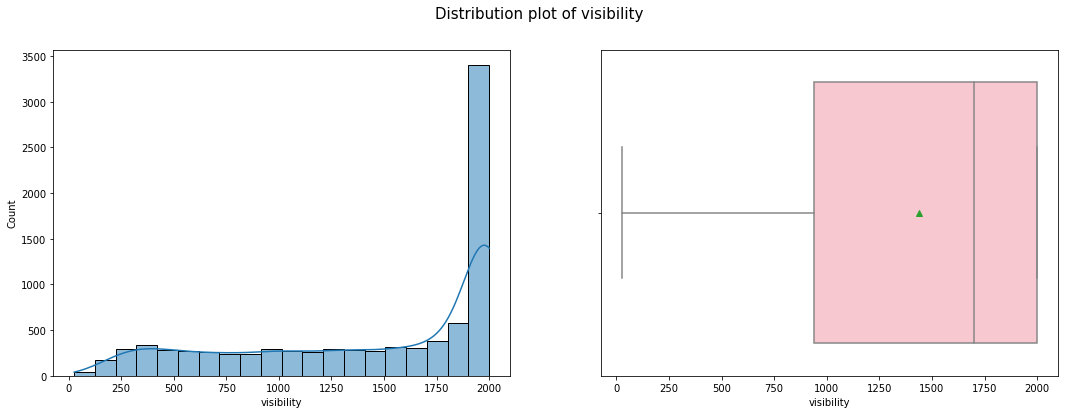

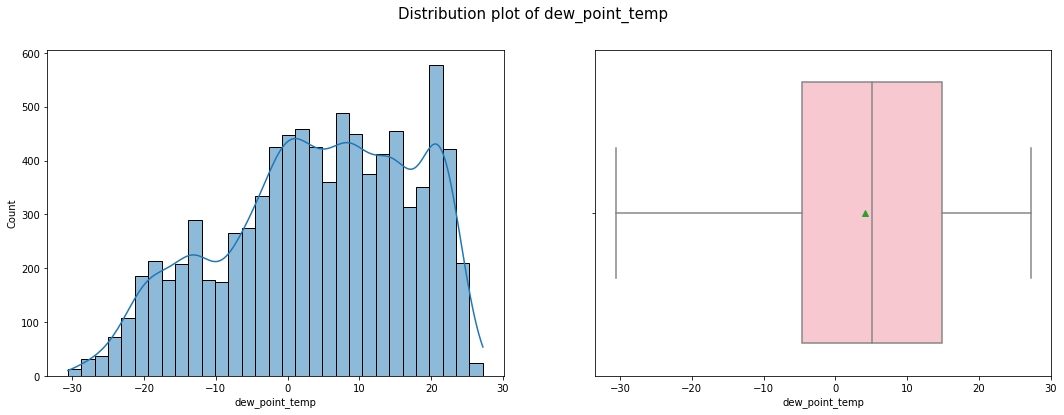

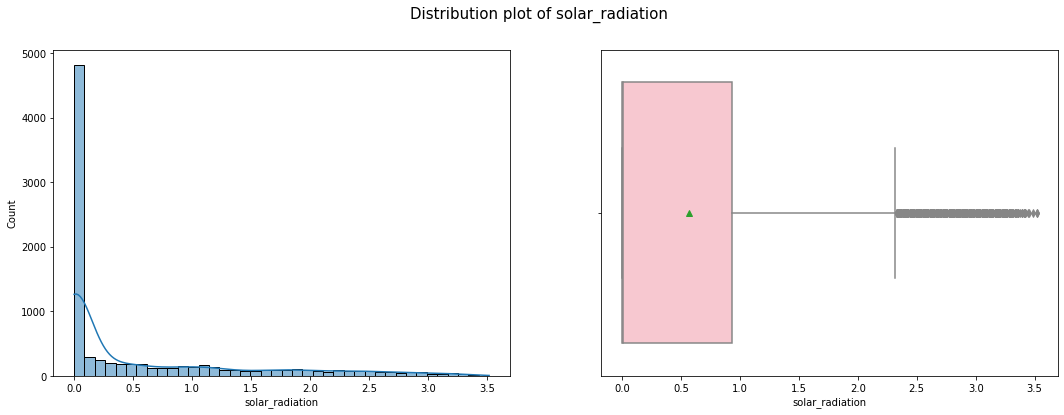

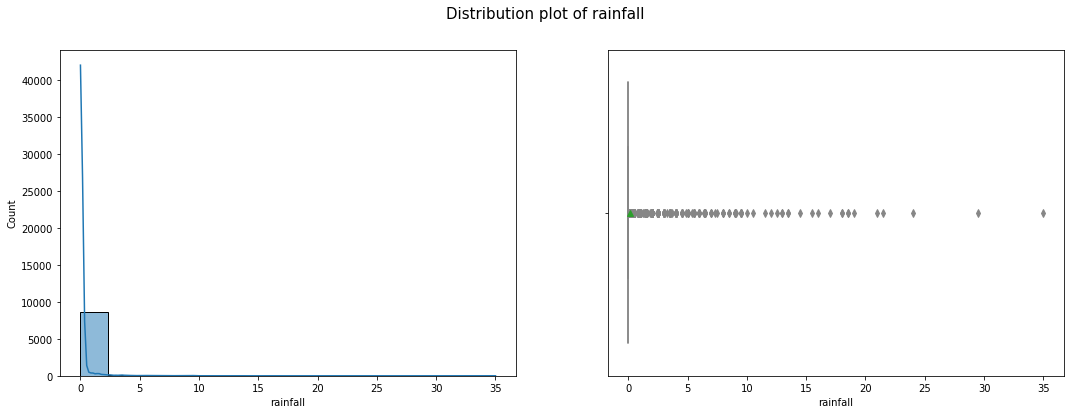

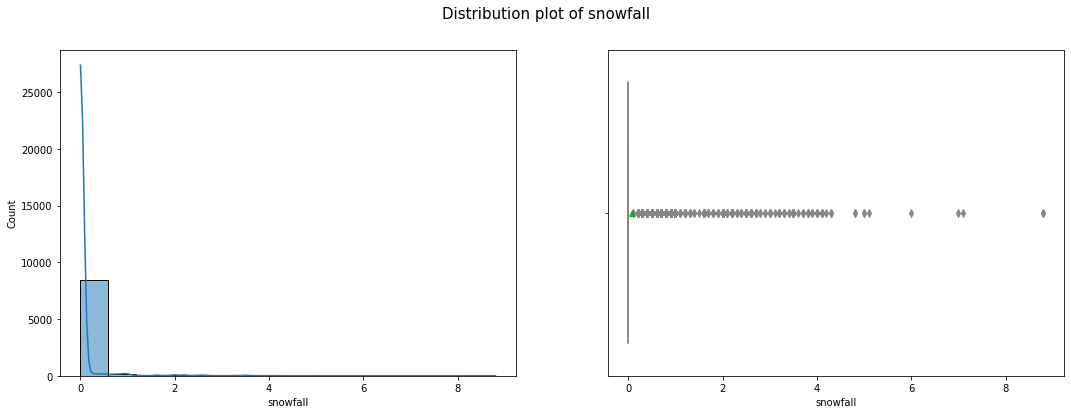

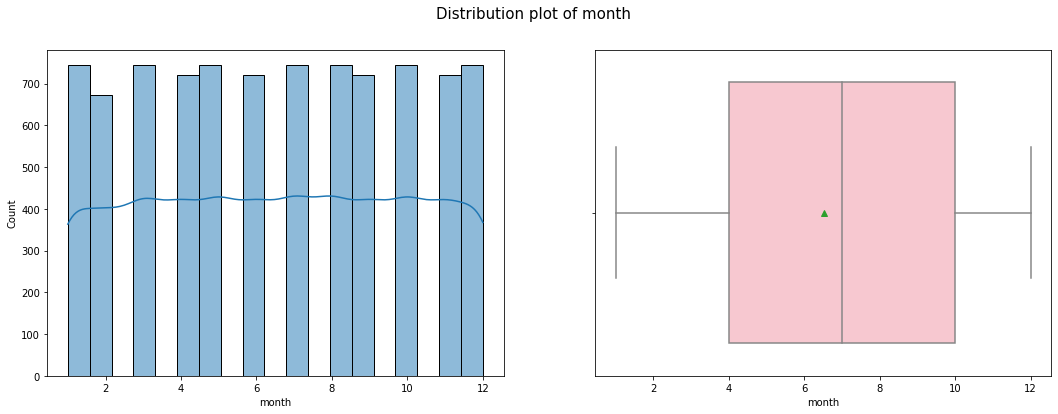

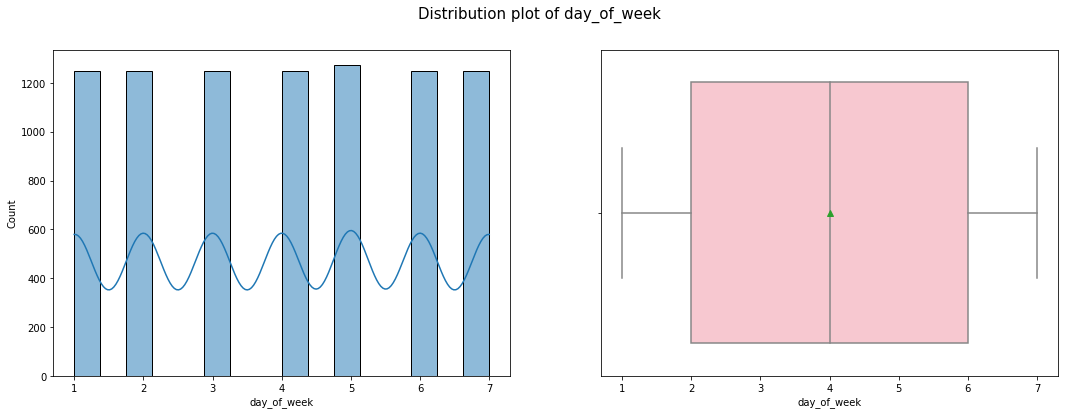

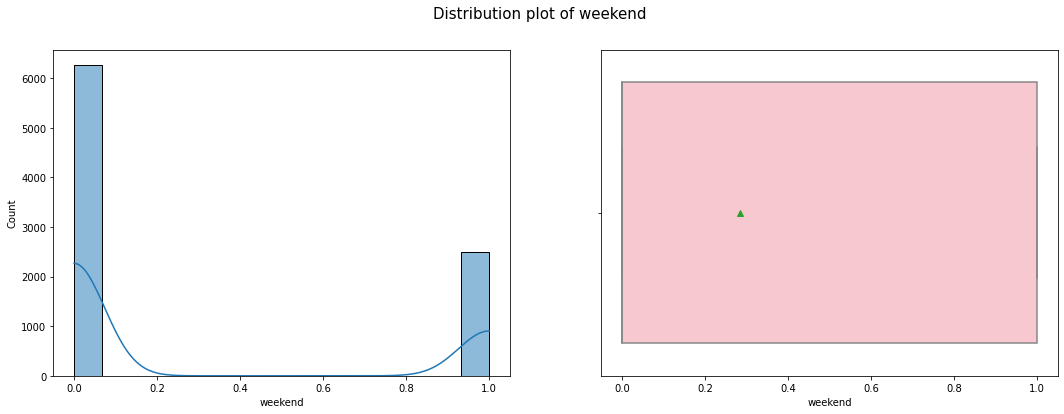

In [27]:
# Visualizing code of histogram plot & boxplot for each columns to know the data distribution
for col in data_2.describe().columns:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
    sns.histplot(data_2[col], ax = axes[0],kde = True)
    sns.boxplot(data_2[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 15)
    plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3 : Dependent variable with continuous variables (Bivariate)

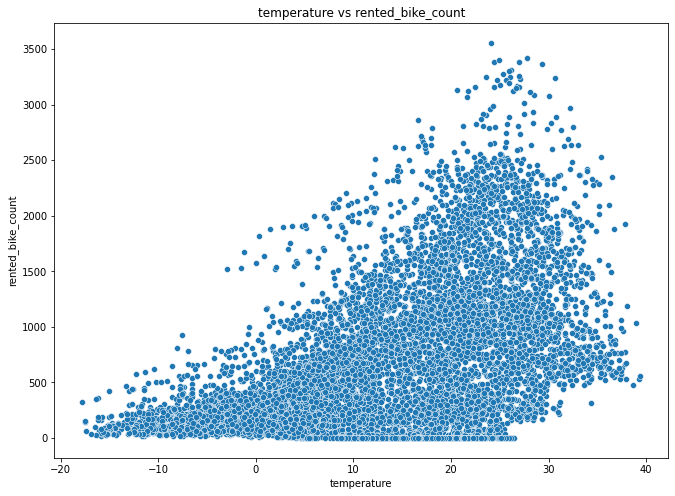

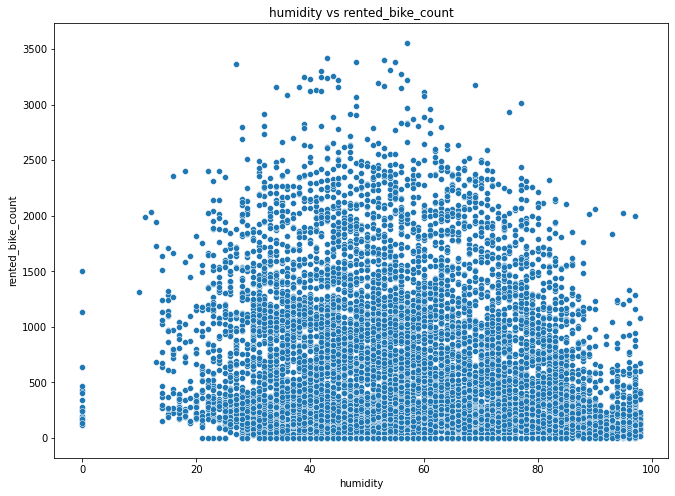

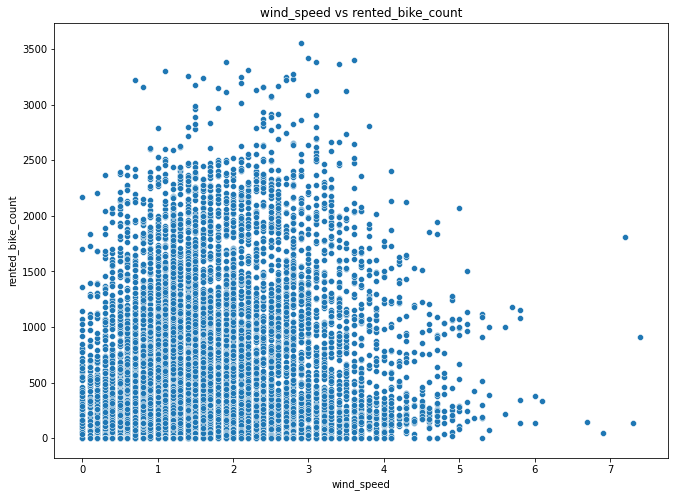

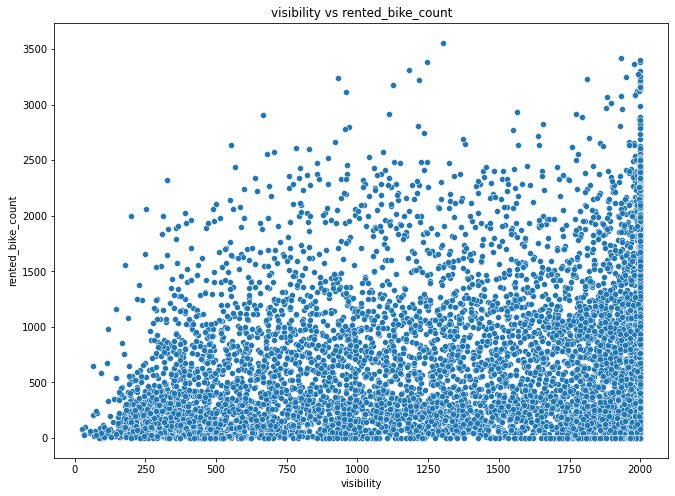

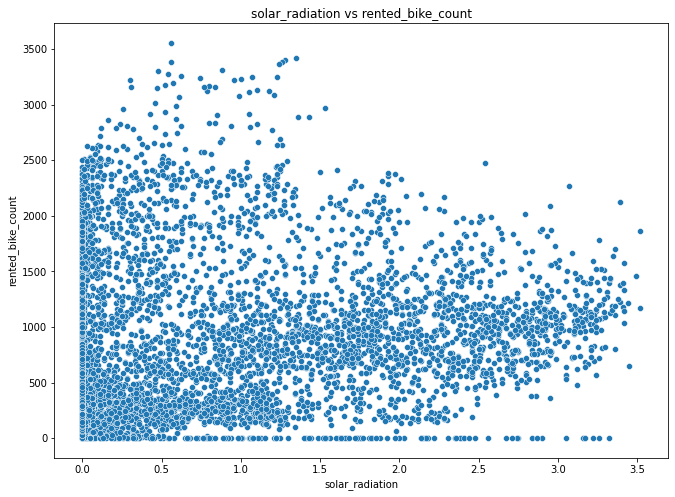

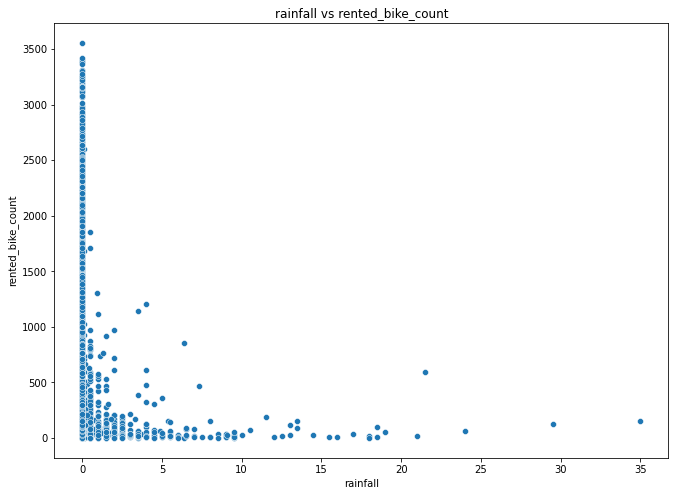

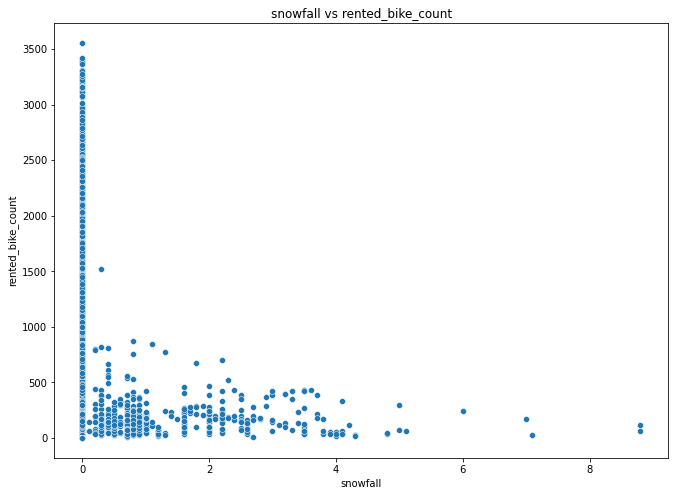

In [28]:
# Chart - 3 visualization code
# Analyzing the relationship between the dependent variable and the continuous variables
for i in cont_var:
  plt.figure(figsize=(11,8))
  sns.scatterplot(x=i,y=dependent_variable[0],data=data_2)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 : Categorical variables with dependent variable (bivariate)

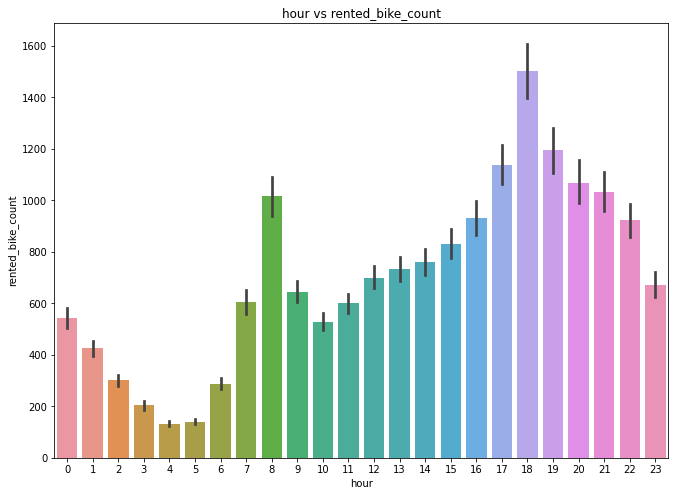

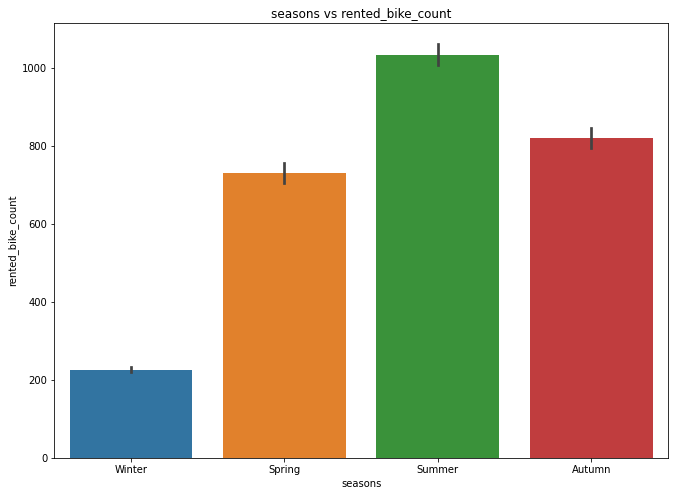

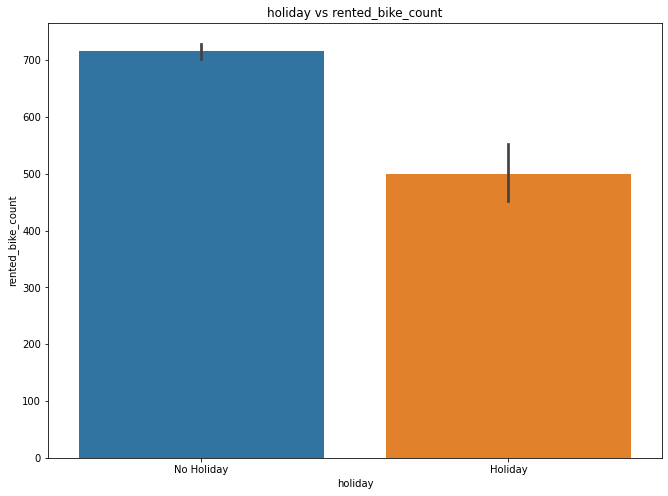

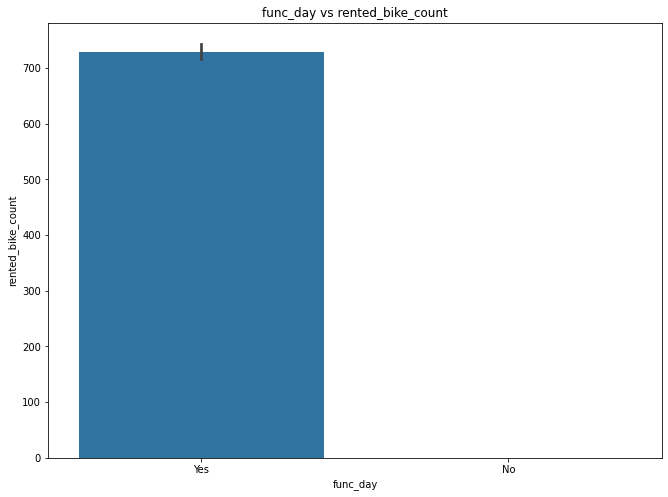

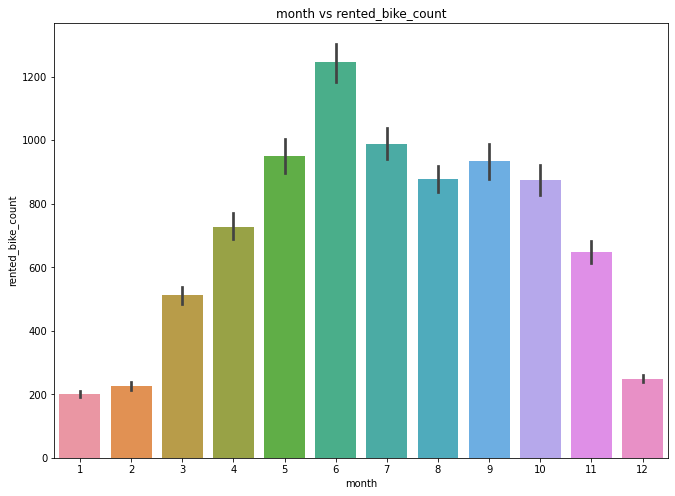

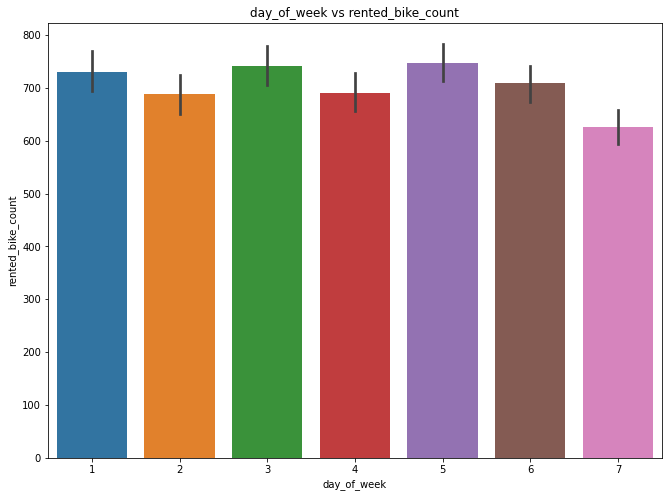

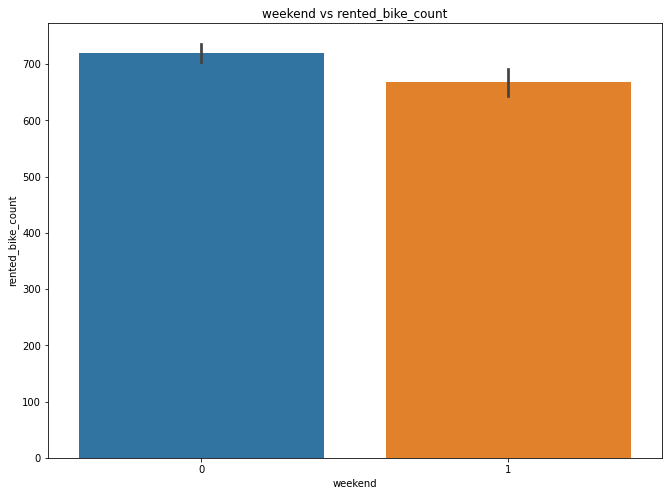

In [29]:
# Chart - 4 visualization code
# Analyzing the relationship between the dependent variable and the categorical variables
for i in cat_var:
  plt.figure(figsize=(11,8))
  sns.barplot(x=i,y=dependent_variable[0],data=data_2)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

Text(0.5, 1.0, 'Average bike rented per hour')

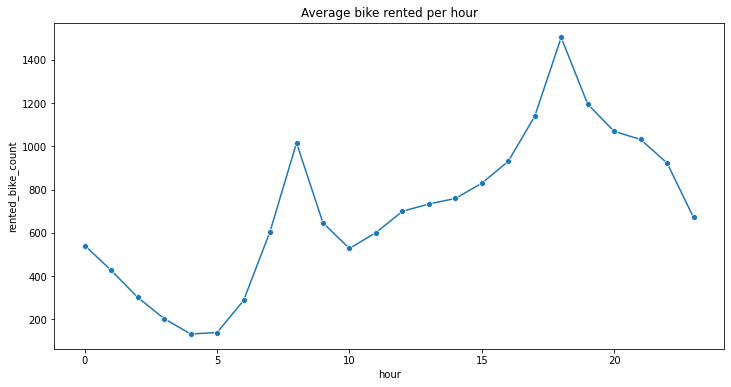

In [30]:
# Chart - 5 visualization code

#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = data_2.groupby('hour')['rented_bike_count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_rent_hrs, marker='o')
plt.title('Average bike rented per hour')
# a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
# a.set_xticks(range(len(avg_rent_hrs)))
# a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 : Bike demand throughout the day (Multivariate)

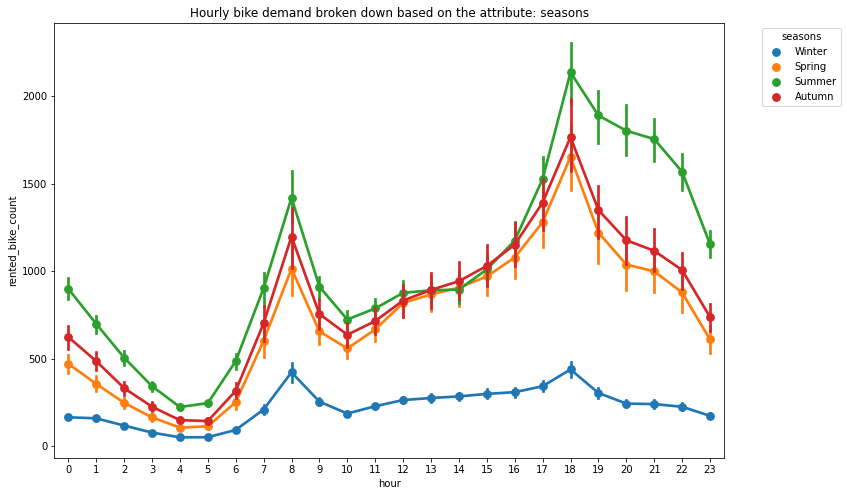

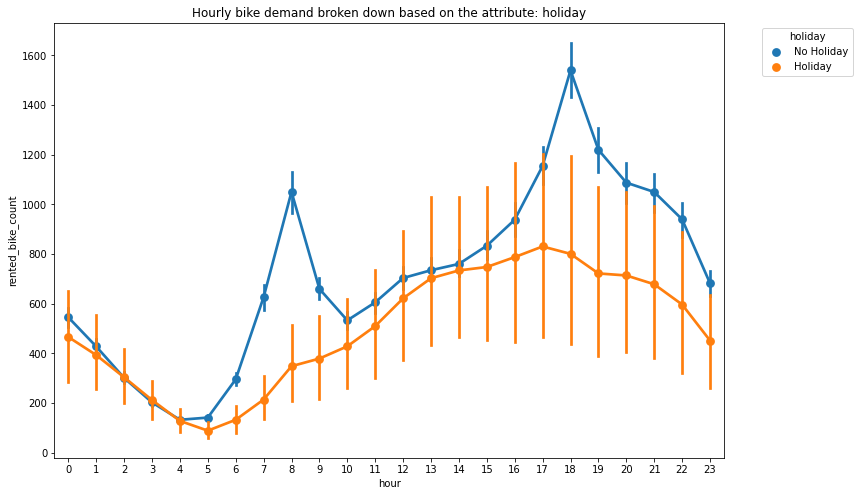

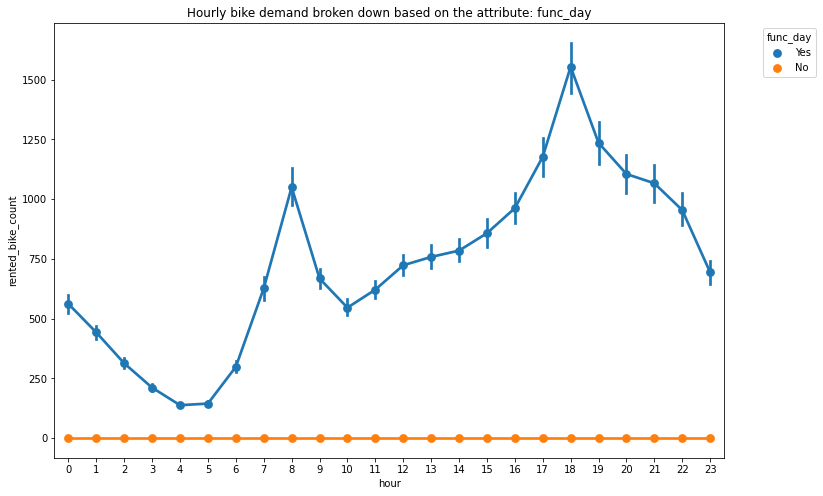

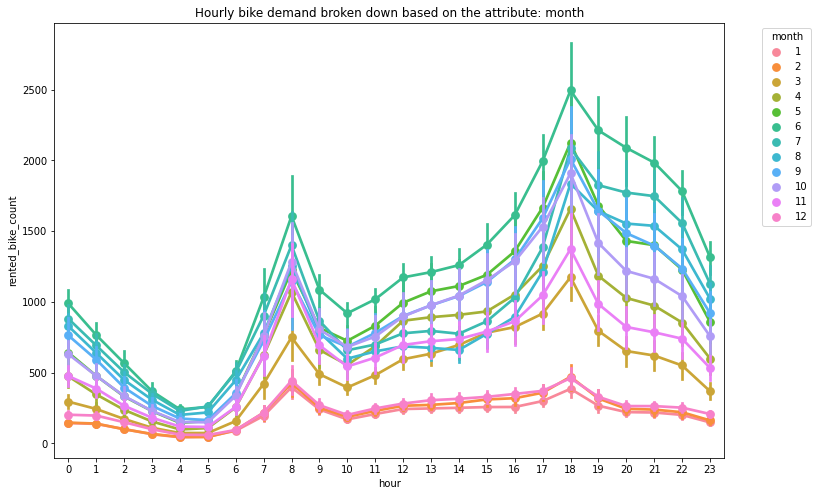

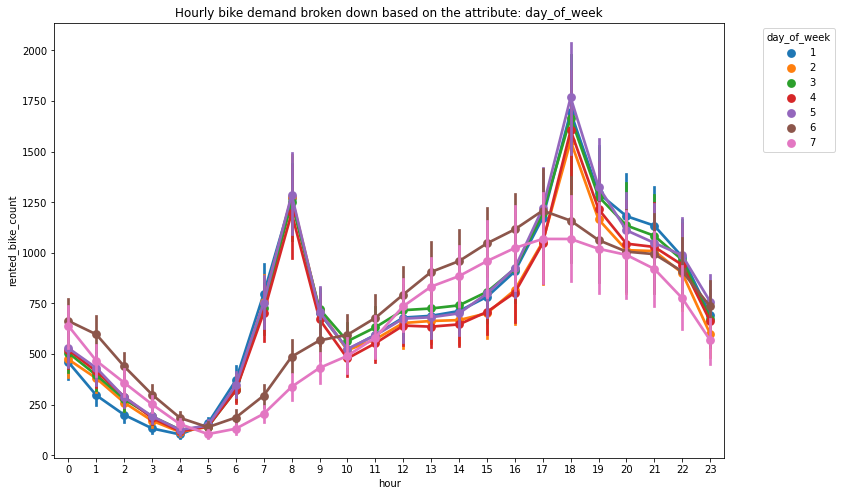

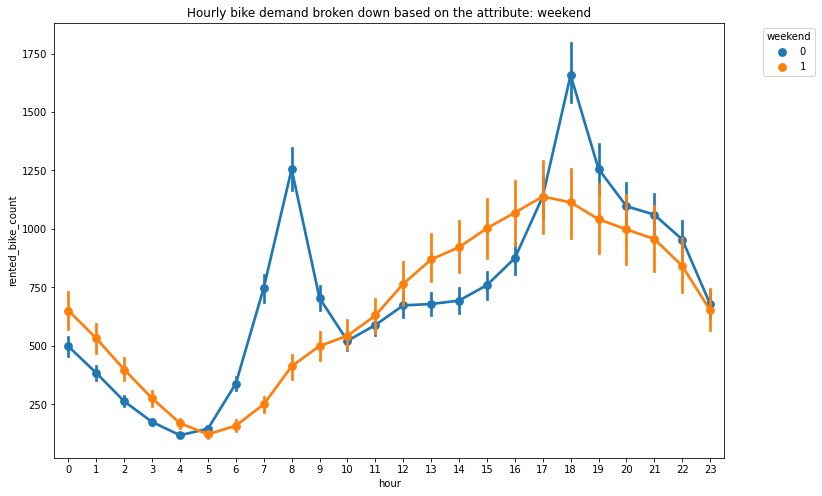

In [31]:
# Chart - 6 visualization code
for i in cat_var:
  if i == 'hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(12,8))
    sns.pointplot(data=data_2, x='hour', y='rented_bike_count', hue=i, ax=ax)
    plt.title('Hourly bike demand broken down based on the attribute: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

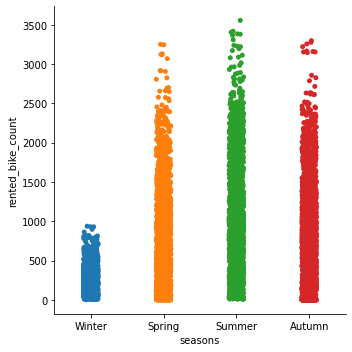

In [32]:
# Chart - 7 visualization code
#plot for rented bike count seasonly
sns.catplot(x='seasons',y='rented_bike_count',data=data_2)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [33]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [34]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [35]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [36]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [37]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [38]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

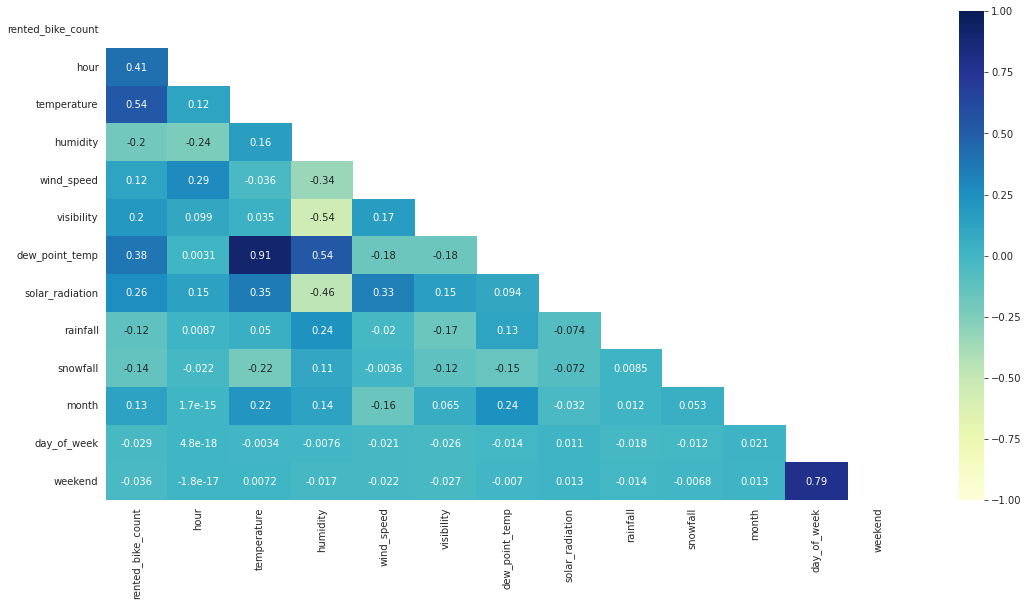

In [39]:
# Correlation Heatmap visualization code
corr = data_2.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

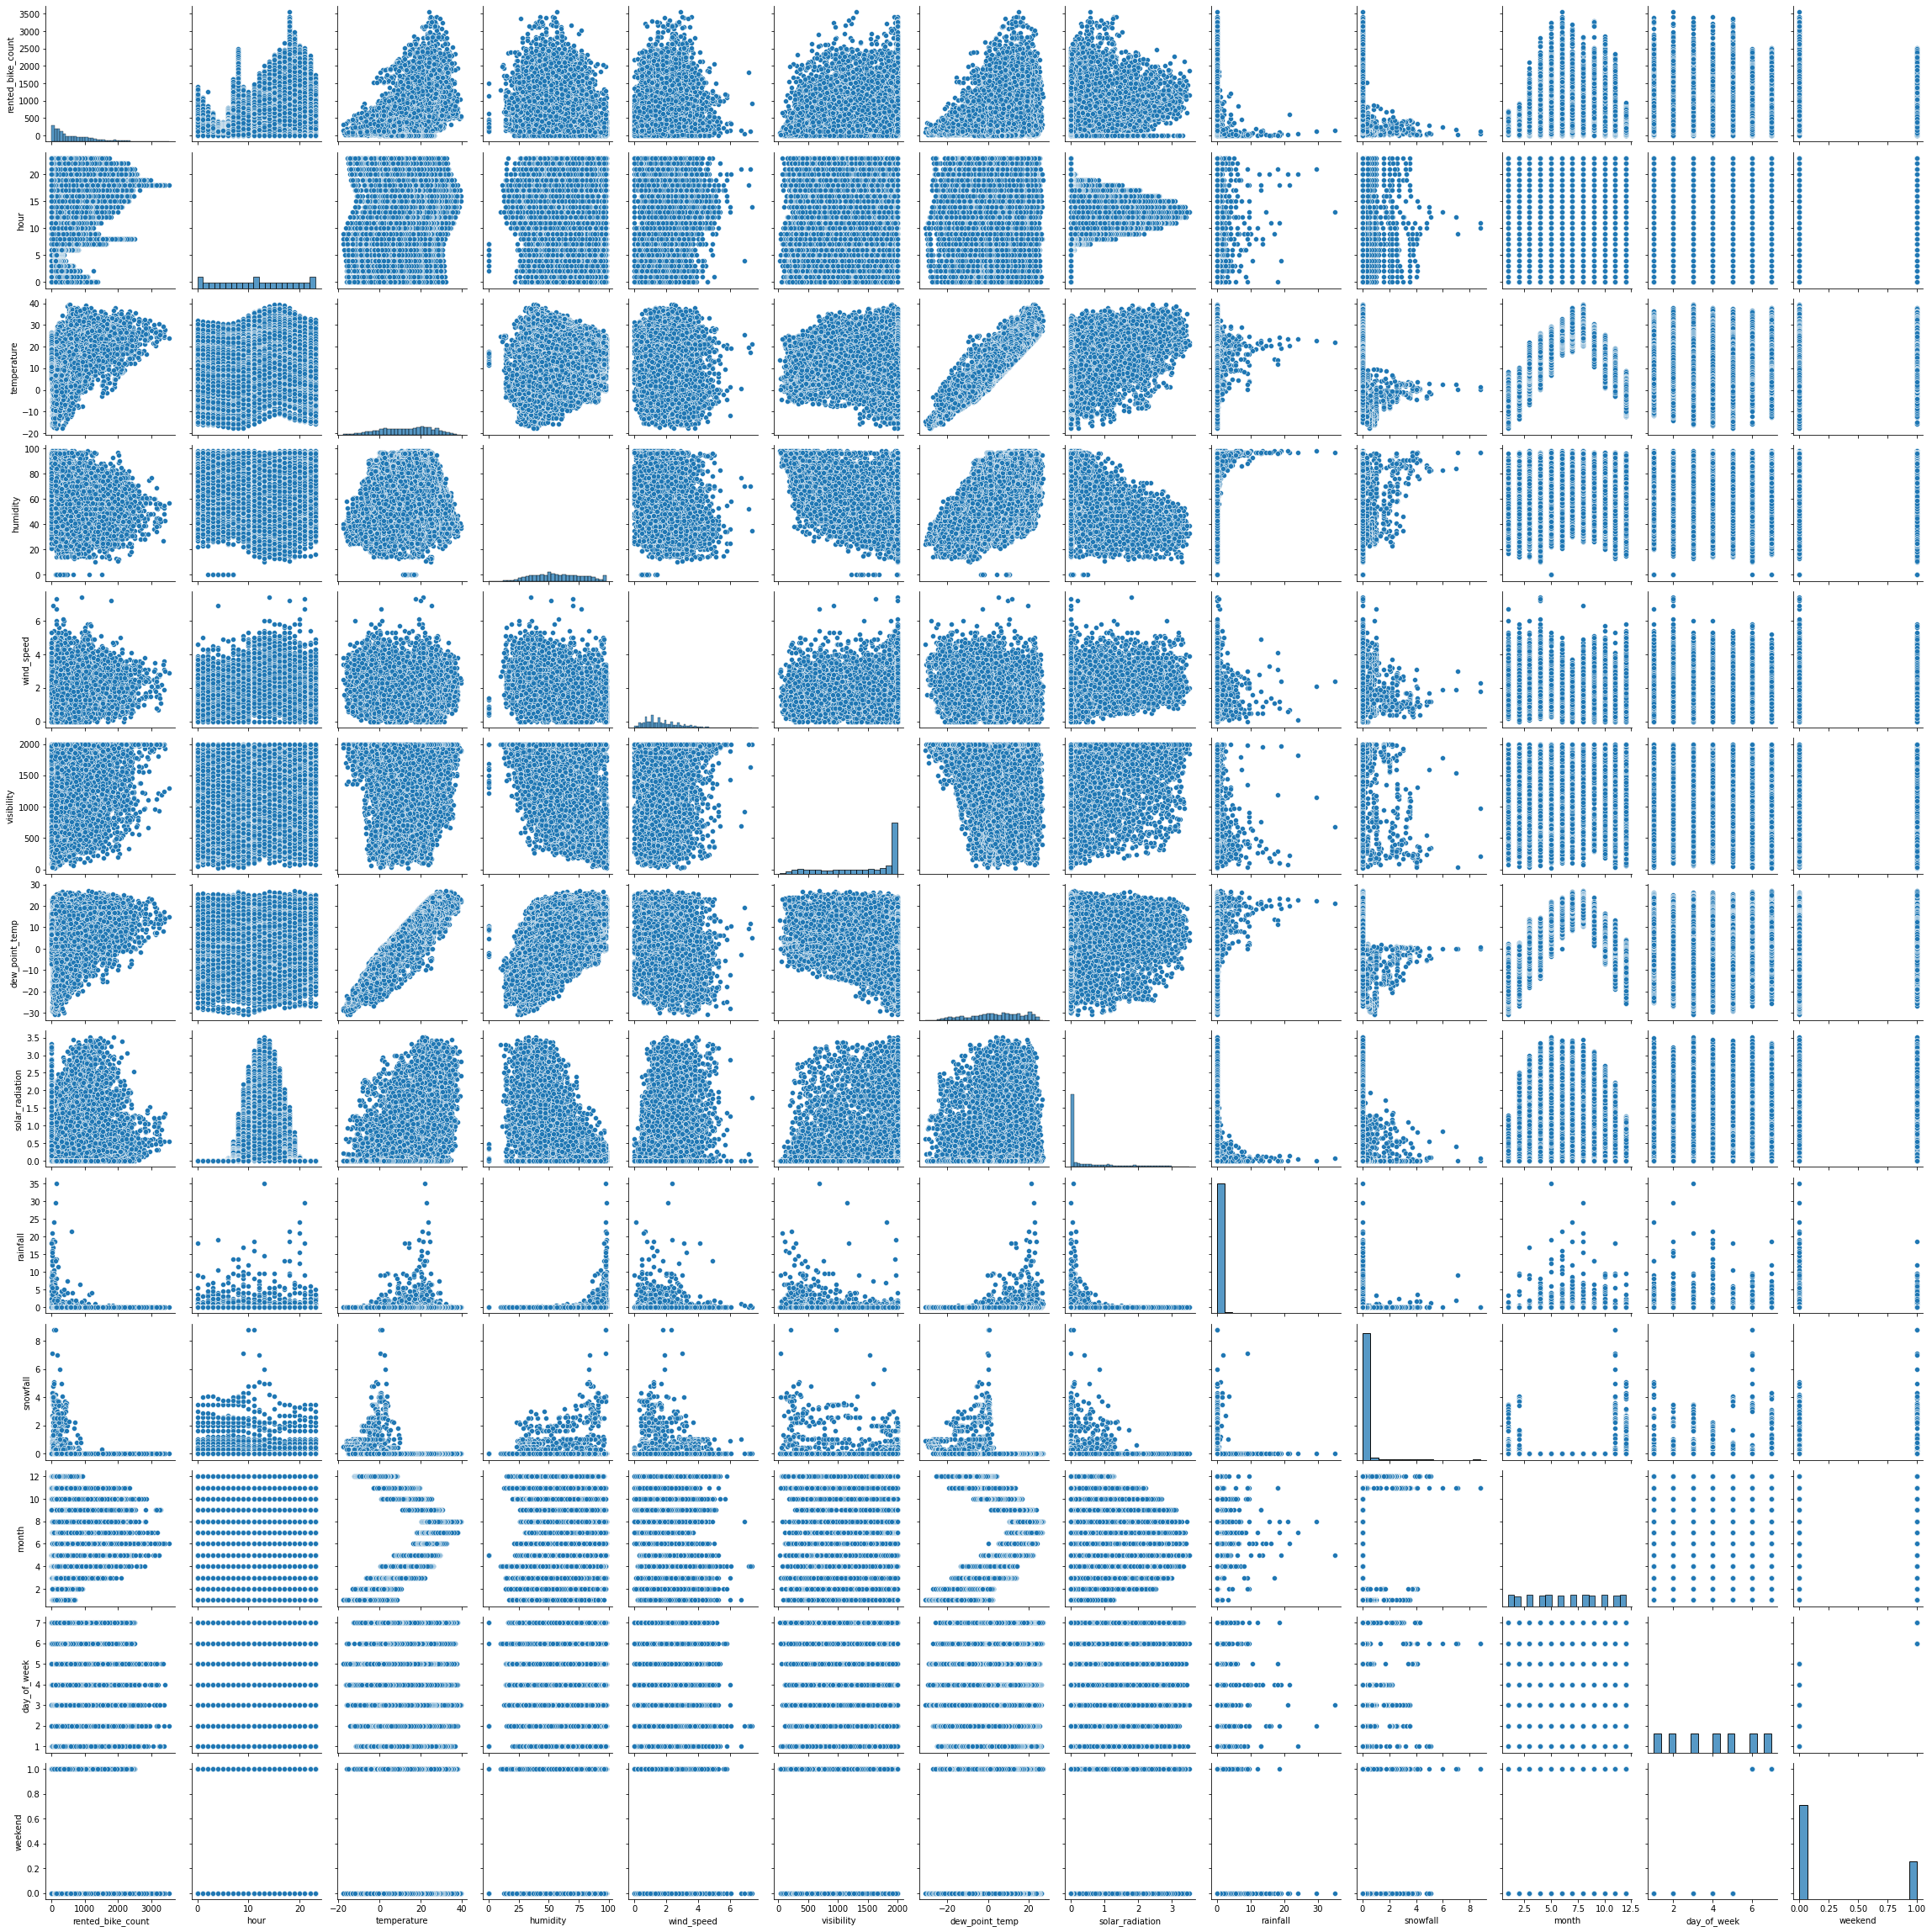

In [40]:
# Pair Plot
sns.pairplot(data_2)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [44]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [45]:
# # Handling Outliers & Outlier treatments

# # Removing outliers by Using IQR method:
# q1, q3, median = data_2.rented_bike_count.quantile([0.25,0.75,0.5])
# lower_limit = q1 - 1.5*(q3-q1)
# upper_limit = q3 + 1.5*(q3-q1)
# data_2['rented_bike_count'] = np.where(data_2['rented_bike_count'] > upper_limit, median,np.where(data_2['rented_bike_count'] < lower_limit,median,data_2['rented_bike_count']))

# # Removing outliers by Capping:
# for col in ['wind_speed','solar_radiation','rainfall','snowfall']:
#   upper_limit = data_2[col].quantile(0.99)
#   data_2[col] = np.where(data_2[col] > upper_limit, upper_limit, data_2[col])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

Since there are vaey few day on which there was snowfall / rainfall, it is in our interest that we convert these columns to binary categorical columns indicating whether there was rainfall / snowfall at that particular hour

In [46]:
# Encode your categorical columns
# Converting snowfall and rainfall to categorical attributes
data_2['snowfall'] = data_2['snowfall'].apply(lambda x: 1 if x>0 else 0)
data_2['rainfall'] = data_2['rainfall'].apply(lambda x: 1 if x>0 else 0)

For visibility
When

Visibility >= 20 Km ---> Clear (high visibility)
4 Km <= Visibility < 10 Km ---> Haze (medium visibility)
Visibility < 4 Km ---> Fog (low visibility)
Converting visibility based on the above mentioned threshold values. Since they are ordinal, we can encode them as 0 (low visibility), 1 (medium visibility), 2 (high visibility)

In [47]:
# encoding the visibility column
data_2['visibility'] = data_2['visibility'].apply(lambda x: 0 if 0<=x<=399 else (1 if 400<=x<=999 else 2))

In [48]:
# encoding
data_2['func_day'] = np.where(data_2['func_day'] == 'Yes',1,0)
data_2['holiday'] = np.where(data_2['holiday'] == 'Holiday', 1,0)

In [49]:
# one hot encoding
data_2 = pd.get_dummies(data_2, columns = ['seasons', 'hour', 'visibility', 'month', 'day_of_week' ])

In [50]:
data_2.columns

Index(['date', 'rented_bike_count', 'temperature', 'humidity', 'wind_speed',
       'dew_point_temp', 'solar_radiation', 'rainfall', 'snowfall', 'holiday',
       'func_day', 'weekend', 'seasons_Autumn', 'seasons_Spring',
       'seasons_Summer', 'seasons_Winter', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'visibility_0', 'visibility_1', 'visibility_2',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'day_of_week_7'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

Text(0.5, 1.0, 'Temperature VS Dew point Temperature')

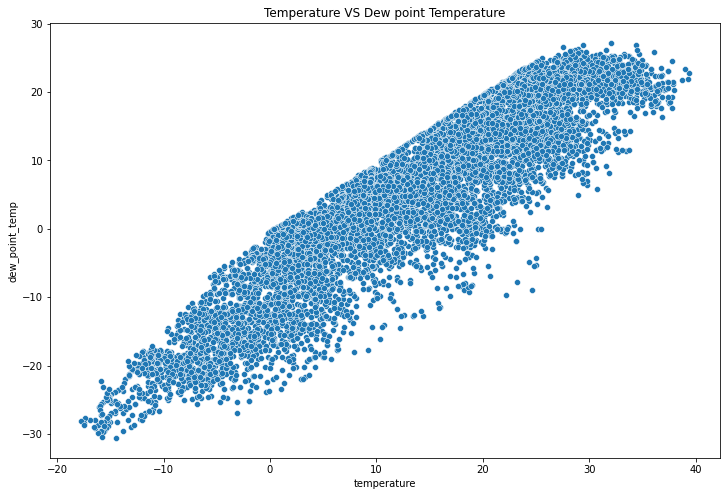

In [51]:
# Manipulate Features to minimize feature correlation and create new features

# We see that the temperature and dew temperature are highly correlated

# Scatter plot to visualize the relationship between
# temperature and dew point temperature
plt.figure(figsize=(12,8))
sns.scatterplot(x='temperature',y='dew_point_temp',data=data_2)
plt.xlabel('temperature')
plt.ylabel('dew_point_temp')
plt.title('Temperature VS Dew point Temperature')



In [52]:
# correlation
data_2[['temperature','dew_point_temp']].corr()

temperature  dew_point_temp
temperature        1.000000        0.912798
dew_point_temp     0.912798        1.000000

In [53]:
# Creating new temperature column with 50% of both temp
data_2['temp'] = 0.5*data_2['temperature'] + 0.5*data_2['dew_point_temp']

#### 2. Feature Selection

In [54]:
features = [i for i in data_2.columns if i not in ['rented_bike_count']]

In [55]:
# Select your features wisely to avoid overfitting
features

['date',
 'temperature',
 'humidity',
 'wind_speed',
 'dew_point_temp',
 'solar_radiation',
 'rainfall',
 'snowfall',
 'holiday',
 'func_day',
 'weekend',
 'seasons_Autumn',
 'seasons_Spring',
 'seasons_Summer',
 'seasons_Winter',
 'hour_0',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'visibility_0',
 'visibility_1',
 'visibility_2',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'day_of_week_7',
 'temp']

In [56]:
#remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [57]:
continuous_variables = ['temperature', 'humidity', 'wind_speed', 'dew_point_temp', 'solar_radiation', 'temp']

In [58]:
continuous_feature_df = pd.DataFrame(data_2[continuous_variables])

In [59]:
continuous_feature_df

temperature  humidity  wind_speed  dew_point_temp  solar_radiation  \
0            -5.2        37         2.2           -17.6              0.0   
1            -5.5        38         0.8           -17.6              0.0   
2            -6.0        39         1.0           -17.7              0.0   
3            -6.2        40         0.9           -17.6              0.0   
4            -6.0        36         2.3           -18.6              0.0   
...           ...       ...         ...             ...              ...   
8755          4.2        34         2.6           -10.3              0.0   
8756          3.4        37         2.3            -9.9              0.0   
8757          2.6        39         0.3            -9.9              0.0   
8758          2.1        41         1.0            -9.8              0.0   
8759          1.9        43         1.3            -9.3              0.0   

       temp  
0    -11.40  
1    -11.55  
2    -11.85  
3    -11.90  
4    -12.30  
...     ...  
8755  -3.05  
8756  -3.25  
8757  -3.65  
8758  -3.85  
8759  -3.70  

[8760 rows x 6 columns]

In [60]:
calc_vif(data_2[[i for i in continuous_feature_df]])

variables       VIF
0      temperature       inf
1         humidity  3.728151
2       wind_speed  4.486642
3   dew_point_temp       inf
4  solar_radiation  2.619125
5             temp       inf

In [61]:

calc_vif(data_2[[i for i in continuous_feature_df if i not in ['dew_point_temp','temperature']]])

variables       VIF
0         humidity  3.539282
1       wind_speed  3.479585
2  solar_radiation  1.956713
3             temp  2.027904

In [62]:
# dropping data, weekend, temperature and dew_point_temperature
data_2.drop(['date','weekend', 'dew_point_temp', 'temperature'],axis=1, inplace=True)

In [63]:
data_2.head()

rented_bike_count  humidity  wind_speed  solar_radiation  rainfall  \
0                254        37         2.2              0.0         0   
1                204        38         0.8              0.0         0   
2                173        39         1.0              0.0         0   
3                107        40         0.9              0.0         0   
4                 78        36         2.3              0.0         0   

   snowfall  holiday  func_day  seasons_Autumn  seasons_Spring  ...  month_11  \
0         0        0         1               0               0  ...         0   
1         0        0         1               0               0  ...         0   
2         0        0         1               0               0  ...         0   
3         0        0         1               0               0  ...         0   
4         0        0         1               0               0  ...         0   

   month_12  day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  \
0         1              0              0              0              0   
1         1              0              0              0              0   
2         1              0              0              0              0   
3         1              0              0              0              0   
4         1              0              0              0              0   

   day_of_week_5  day_of_week_6  day_of_week_7   temp  
0              1              0              0 -11.40  
1              1              0              0 -11.55  
2              1              0              0 -11.85  
3              1              0              0 -11.90  
4              1              0              0 -12.30  

[5 rows x 59 columns]

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

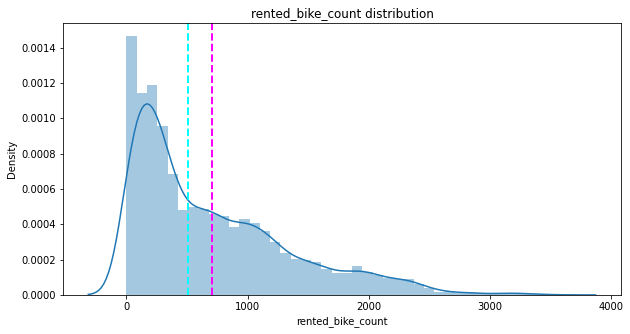

In [64]:
# Transform Your data
# visualizing the distribution of the dependent variable - rental bike count
plt.figure(figsize=(10,5))
sns.distplot(data_2[dependent_variable])
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')
plt.axvline(data_2[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(data_2[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)

In [65]:
# skew of the dependent variable
data_2[dependent_variable].skew()

rented_bike_count    1.153428
dtype: float64

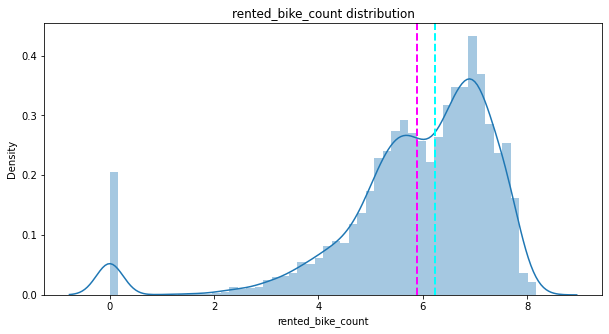

In [66]:
# visualizing the distribution of dependent variable after log transformation
plt.figure(figsize=(10,5))
sns.distplot(np.log1p(data_2[dependent_variable]))
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')
plt.axvline(np.log1p(data_2['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.log1p(data_2['rented_bike_count']).median(), color='cyan', linestyle='dashed', linewidth=2)

In [67]:
# skew of the dependent variable after log transformation
np.log1p(data_2[dependent_variable]).skew()

rented_bike_count   -1.832199
dtype: float64

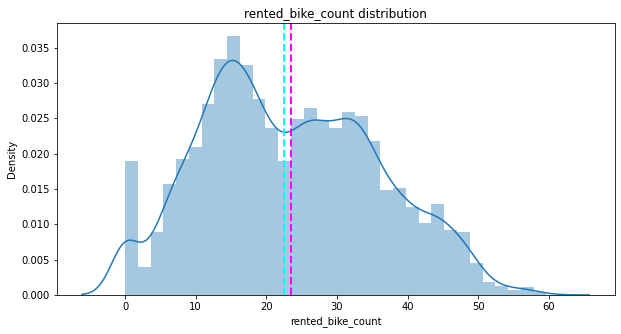

In [68]:
# visualizing the distribution of dependent variable after sqrt transformation
plt.figure(figsize=(10,5))
sns.distplot(np.sqrt(data_2[dependent_variable]))
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')
plt.axvline(np.sqrt(data_2['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.sqrt(data_2['rented_bike_count']).median(), color='cyan', linestyle='dashed', linewidth=2)

In [69]:
# # skew of the dependent variable after sqrt transformation
np.sqrt(data_2[dependent_variable]).skew()

rented_bike_count    0.237362
dtype: float64

We were able to reduce skewness on square root transformation. Hence we can use square root transformation during the modelling.

In [70]:
# Defining dependent and independent variables
X = data_2.drop('rented_bike_count',axis=1)
y = np.sqrt(data_2[dependent_variable])

In [71]:
X

humidity  wind_speed  solar_radiation  rainfall  snowfall  holiday  \
0           37         2.2              0.0         0         0        0   
1           38         0.8              0.0         0         0        0   
2           39         1.0              0.0         0         0        0   
3           40         0.9              0.0         0         0        0   
4           36         2.3              0.0         0         0        0   
...        ...         ...              ...       ...       ...      ...   
8755        34         2.6              0.0         0         0        0   
8756        37         2.3              0.0         0         0        0   
8757        39         0.3              0.0         0         0        0   
8758        41         1.0              0.0         0         0        0   
8759        43         1.3              0.0         0         0        0   

      func_day  seasons_Autumn  seasons_Spring  seasons_Summer  ...  month_11  \
0            1               0               0               0  ...         0   
1            1               0               0               0  ...         0   
2            1               0               0               0  ...         0   
3            1               0               0               0  ...         0   
4            1               0               0               0  ...         0   
...        ...             ...             ...             ...  ...       ...   
8755         1               1               0               0  ...         1   
8756         1               1               0               0  ...         1   
8757         1               1               0               0  ...         1   
8758         1               1               0               0  ...         1   
8759         1               1               0               0  ...         1   

      month_12  day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  \
0            1              0              0              0              0   
1            1              0              0              0              0   
2            1              0              0              0              0   
3            1              0              0              0              0   
4            1              0              0              0              0   
...        ...            ...            ...            ...            ...   
8755         0              0              0              0              0   
8756         0              0              0              0              0   
8757         0              0              0              0              0   
8758         0              0              0              0              0   
8759         0              0              0              0              0   

      day_of_week_5  day_of_week_6  day_of_week_7   temp  
0                 1              0              0 -11.40  
1                 1              0              0 -11.55  
2                 1              0              0 -11.85  
3                 1              0              0 -11.90  
4                 1              0              0 -12.30  
...             ...            ...            ...    ...  
8755              1              0              0  -3.05  
8756              1              0              0  -3.25  
8757              1              0              0  -3.65  
8758              1              0              0  -3.85  
8759              1              0              0  -3.70  

[8760 rows x 58 columns]

In [72]:
features

['date',
 'temperature',
 'humidity',
 'wind_speed',
 'dew_point_temp',
 'solar_radiation',
 'rainfall',
 'snowfall',
 'holiday',
 'func_day',
 'weekend',
 'seasons_Autumn',
 'seasons_Spring',
 'seasons_Summer',
 'seasons_Winter',
 'hour_0',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'visibility_0',
 'visibility_1',
 'visibility_2',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'day_of_week_7',
 'temp']

### 6. Data Scaling

In [73]:
features = [i for i in data_2.columns if i not in ['rented_bike_count']]

In [74]:
# Scaling your data
scaler = StandardScaler()
X = scaler.fit_transform(data_2[features])

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [75]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [76]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0)

##### What data splitting ratio have you used and why? 

Answer Here.

## ***7. ML Model Implementation***

In [77]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
  plot the top 20 important features, and returns a list of the model scores'''

  # Squring the y test and and pred as we have used sqrt transformation
  y_t = y_test**2
  y_p = y_pred**2
  y_train2 = y_train**2
  y_train_pred = model.predict(X_train)**2

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_t,y_p)
  mae=mean_absolute_error(y_t,y_p)
  rmse = np.sqrt(mse)
  r2_train = r2_score(y_train2, y_train_pred)
  r2 = r2_score(y_t,y_p)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))
  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values 
  plt.figure(figsize=(18,6))
  plt.plot((y_p)[:100])
  plt.plot((np.array(y_t)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Bike Count', fontsize=18)

  try:
    importance = model.feature_importances_
  except:
    importance = model.coef_
  importance = np.absolute(importance)
  if len(importance)==len(features):
    pass
  else:
    importance = importance[0]

  # Feature importances


  feat = pd.Series(importance, index=features)
  plt.figure(figsize=(12,8))
  plt.title('Feature Importances (top 20) for '+str(model), fontsize = 18)
  plt.xlabel('Relative Importance')
  feat.nlargest(20).plot(kind='barh')


  model_score = [mse,mae,rmse,r2_train,r2,r2_adjusted]
  return model_score

In [78]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE','MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

### ML Model - 1 : Linear Regression

In [79]:
# Import the LinearRegression class
reg = LinearRegression()

# Initialize an instance of the class
reg.fit(X_train, y_train)

# Fit the linear regression model to your training data
y_pred_li = reg.predict(X_test)

In [80]:
# Feature importances

# lr_imp = pd.Series(linear_model.coef_[0], index=X.columns)
# plt.figure(figsize=(10,5))
# plt.title('Feature Importances: DECISION TREE')
# plt.xlabel('Relative Importance')
# lr_imp.nlargest(20).plot(kind='barh')

In [81]:
# np.abs(linear_model.coef_)[0]
# len(linear_model.coef_[0])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 88409.23381252315
RMSE : 297.33690287706156
MAE : 201.73830777442475
Train R2 : 0.7834941807578941
Test R2 : 0.7887587522120924
Adjusted R2 :  0.7815218990687381


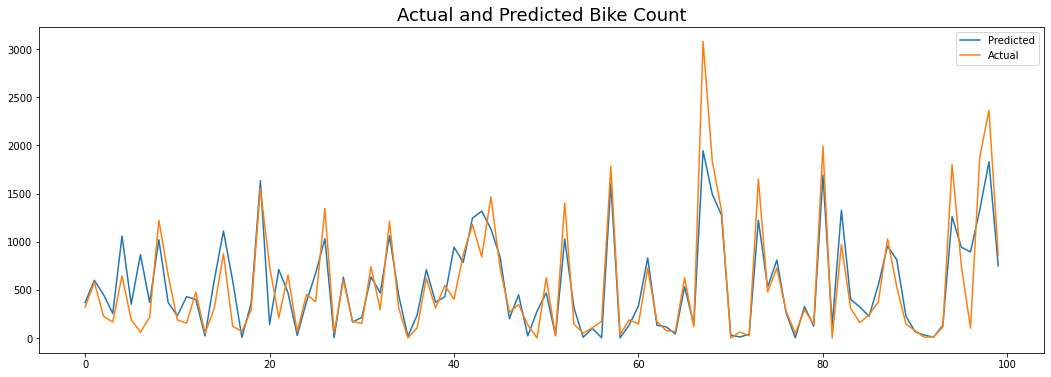

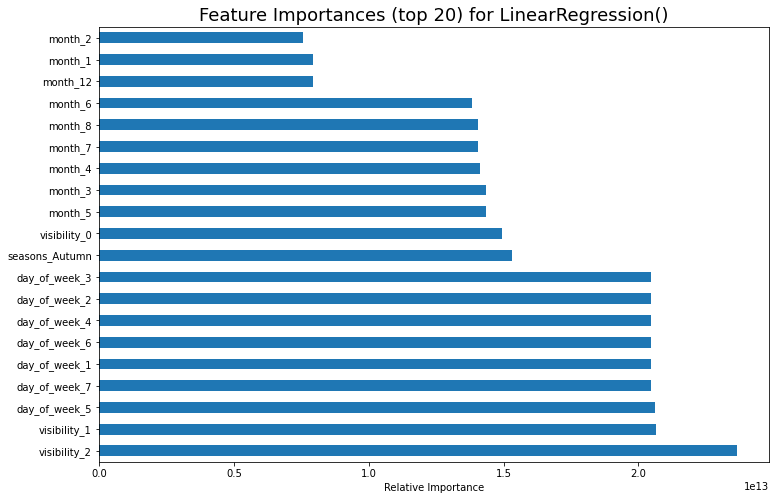

In [82]:
linear_score = evaluate_model(reg, y_test,y_pred_li)
# Evaluation Metric Score chart
score['Linear regression'] = linear_score

In [83]:
score

Linear regression
MSE               88409.233813
RMSE                201.738308
MAE                 297.336903
Train R2              0.783494
Test R2               0.788759
Adjusted R2           0.781522

#### 2. Cross- Validation & Hyperparameter Tuning

In [84]:
# Define the model
reg = LinearRegression()

# Define the parameters to be optimized
param_grid = {'normalize': [True, False]}

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'normalize': [True, False]}, return_train_score=True,
             scoring='r2')

In [85]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best parameters:  {'normalize': True}
Best R2 score:  0.8030417468146658


In [86]:
# use the best parameter to train the model
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

LinearRegression(normalize=True)

In [87]:
# predict on test data
y_pred_li2 = best_reg.predict(X_test)

MSE : 88117.63209241908
RMSE : 296.84614212150217
MAE : 201.69583791923128
Train R2 : 0.7840590702408408
Test R2 : 0.7894554929093651
Adjusted R2 :  0.7822425092051378


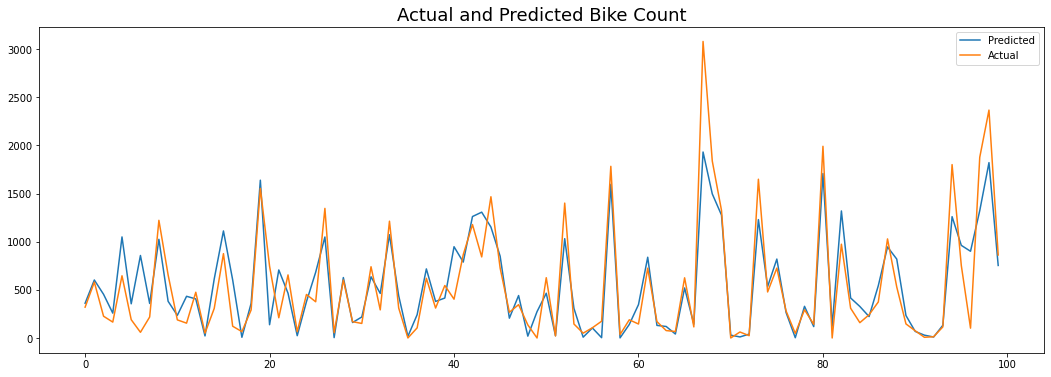

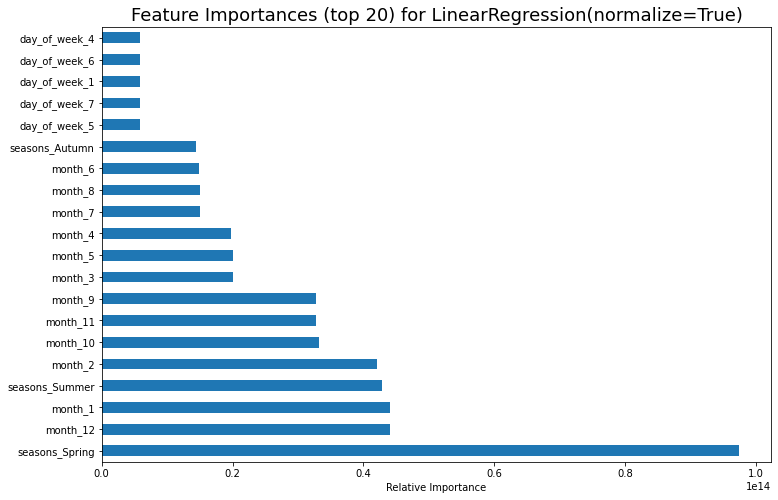

In [88]:
linear_score2 = evaluate_model(best_reg, y_test,y_pred_li2)

In [89]:
score['Linear regression tuned'] = linear_score2

In [90]:
score

Linear regression  Linear regression tuned
MSE               88409.233813             88117.632092
RMSE                201.738308               201.695838
MAE                 297.336903               296.846142
Train R2              0.783494                 0.784059
Test R2               0.788759                 0.789455
Adjusted R2           0.781522                 0.782243

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 : Lasso Regression

In [91]:
#import Lasso regressor 
from sklearn.linear_model import Lasso

# Import the Lasso Regression class
lasso = Lasso()

# Initialize an instance of the class
lasso.fit(X_train, y_train)

# Fit the lasso regression model to your training data
y_pred_lasso1 = lasso.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 190488.001771272
RMSE : 436.4493118006626
MAE : 292.6232046230386
Train R2 : 0.5398906483861564
Test R2 : 0.544856103287609
Adjusted R2 :  0.5292634594545798


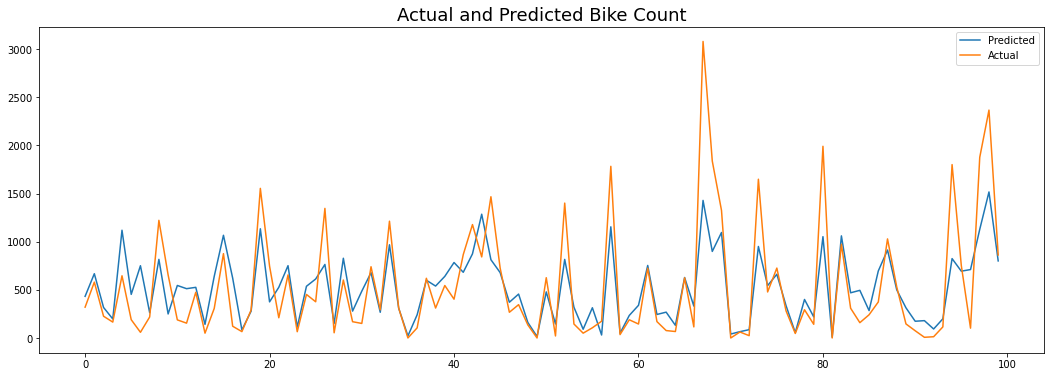

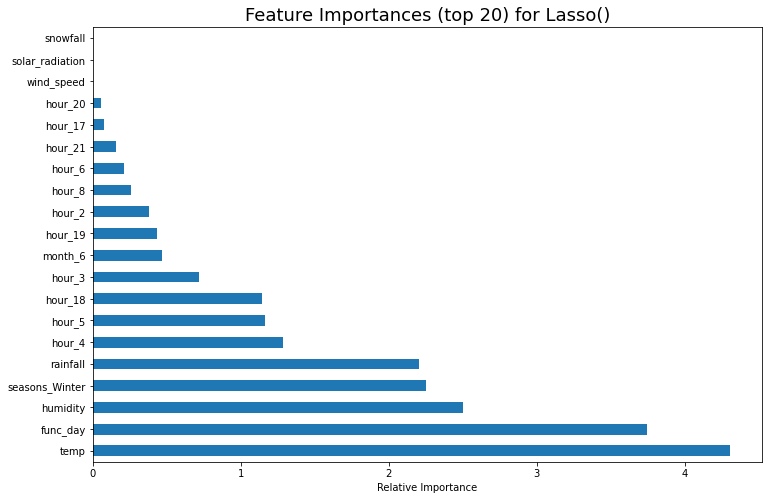

In [92]:
lasso_score = evaluate_model(lasso, y_test,y_pred_lasso1)
score['Lasso regression'] = lasso_score

In [93]:
score

Linear regression  Linear regression tuned  Lasso regression
MSE               88409.233813             88117.632092     190488.001771
RMSE                201.738308               201.695838        292.623205
MAE                 297.336903               296.846142        436.449312
Train R2              0.783494                 0.784059          0.539891
Test R2               0.788759                 0.789455          0.544856
Adjusted R2           0.781522                 0.782243          0.529263

#### 2. Cross- Validation & Hyperparameter Tuning

In [94]:
#import Lasso regressor and grid search cv
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
#fitting model
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [95]:
#getting optimum parameters
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The optimum alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -30.341875454605532


In [96]:
# Import the Lasso Regression class with best alpha
lasso = Lasso(alpha = lasso_regressor.best_params_['alpha'])

# Initialize an instance of the class
lasso.fit(X_train, y_train)

# Fit the lasso regression model to your training data
y_pred_lassocv = lasso.predict(X_test)

MSE : 88357.26631855253
RMSE : 297.24950179697953
MAE : 201.70418161172134
Train R2 : 0.7834783084687953
Test R2 : 0.788882921122933
Adjusted R2 :  0.7816503218465775


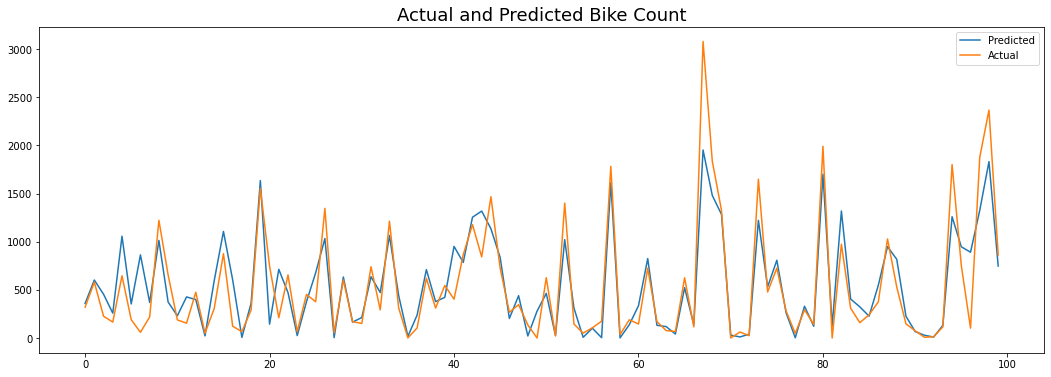

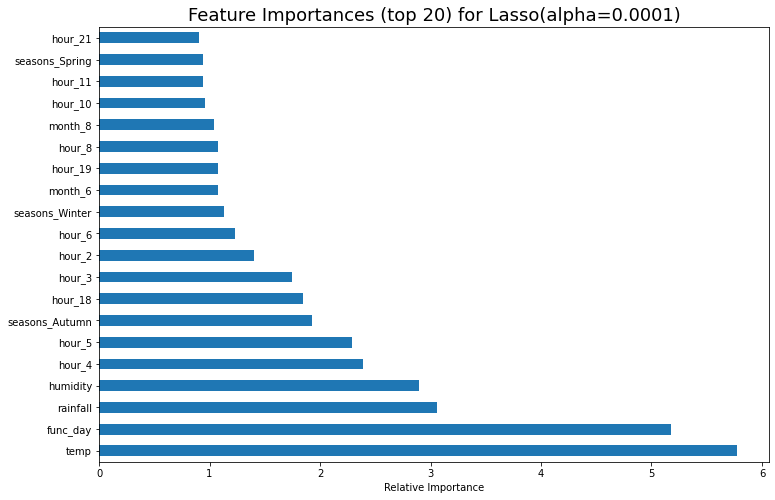

In [97]:
#Evaluation matrices for Lasso regression
lasso2 = evaluate_model(lasso, y_test,y_pred_lassocv)

name = 'Lasso with alpha = ' + str(lasso_regressor.best_params_['alpha'])

score[name] = lasso2

In [98]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88409.233813             88117.632092     190488.001771   
RMSE                201.738308               201.695838        292.623205   
MAE                 297.336903               296.846142        436.449312   
Train R2              0.783494                 0.784059          0.539891   
Test R2               0.788759                 0.789455          0.544856   
Adjusted R2           0.781522                 0.782243          0.529263   

             Lasso with alpha = 0.0001  
MSE                       88357.266319  
RMSE                        201.704182  
MAE                         297.249502  
Train R2                      0.783478  
Test R2                       0.788883  
Adjusted R2                   0.781650

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 : Ridge Regression

In [99]:
#import Ridge regressor
from sklearn.linear_model import Ridge
ridge = Ridge()

#prediction for Ridge regression
ridge.fit(X_train, y_train)

# Predict on the model
y_pred_ridge1 = ridge.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 88364.579983569
RMSE : 297.261803775004
MAE : 201.71713849389508
Train R2 : 0.7834629218323412
Test R2 : 0.7888654461640701
Adjusted R2 :  0.7816322482181256


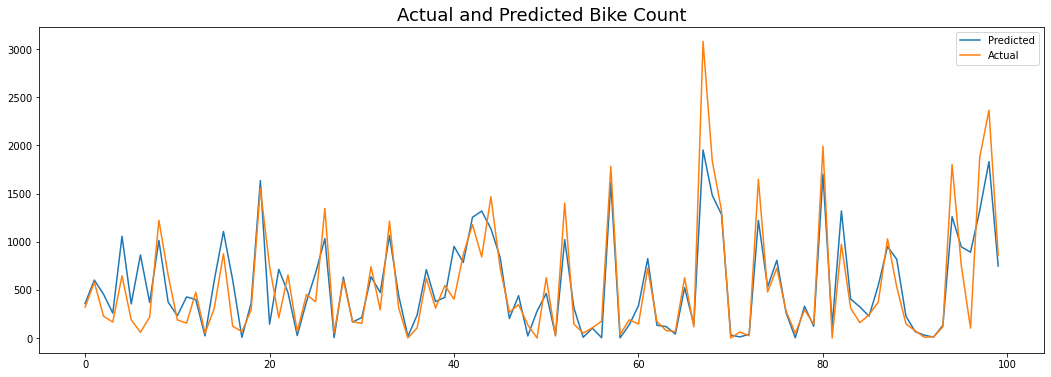

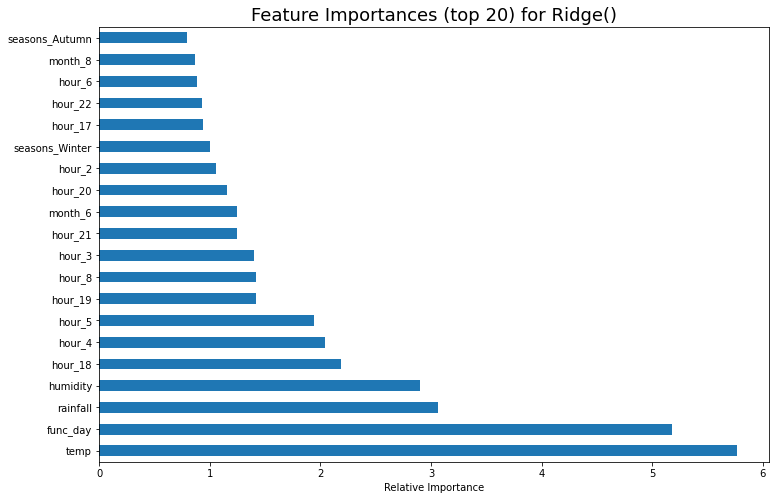

In [100]:
# Evaluation Metric Score chart
result = evaluate_model(ridge, y_test,y_pred_ridge1)
score['Ridge'] = result

In [101]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88409.233813             88117.632092     190488.001771   
RMSE                201.738308               201.695838        292.623205   
MAE                 297.336903               296.846142        436.449312   
Train R2              0.783494                 0.784059          0.539891   
Test R2               0.788759                 0.789455          0.544856   
Adjusted R2           0.781522                 0.782243          0.529263   

             Lasso with alpha = 0.0001         Ridge  
MSE                       88357.266319  88364.579984  
RMSE                        201.704182    201.717138  
MAE                         297.249502    297.261804  
Train R2                      0.783478      0.783463  
Test R2                       0.788883      0.788865  
Adjusted R2                   0.781650      0.781632

#### 2. Cross- Validation & Hyperparameter Tuning

In [102]:
#import Ridge regressor
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
#fitting model
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [103]:
#getting optimum parameters
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -30.34149620418456


In [104]:
# Initiate ridge with best alpha  
ridge = Ridge(alpha = ridge_regressor.best_params_['alpha'])

#prediction for Ridge regression
ridge.fit(X_train, y_train)

# Predict on model
y_pred_ridge = ridge.predict(X_test)

MSE : 88411.35025984643
RMSE : 297.3404618612247
MAE : 201.78342718888914
Train R2 : 0.7833668104202947
Test R2 : 0.7887536952632402
Adjusted R2 :  0.78151666887533


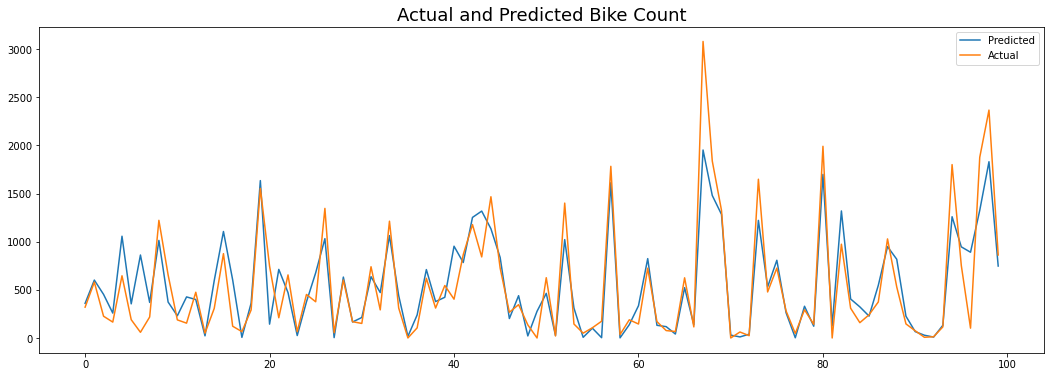

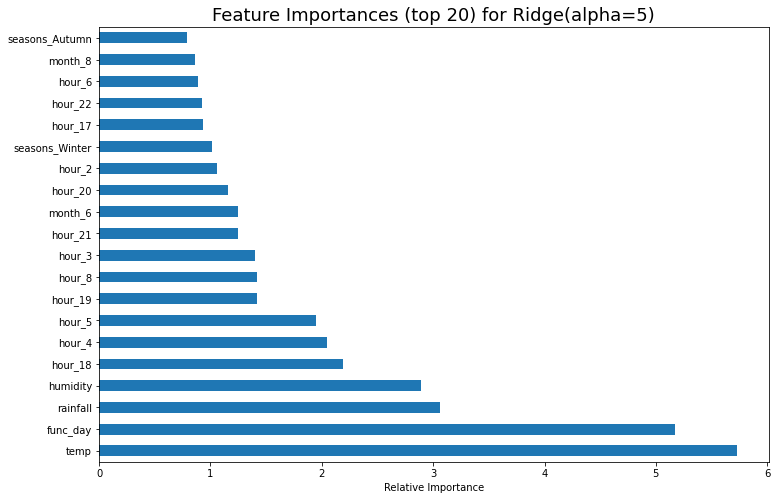

In [105]:
#Evaluation matrices for Ridge regression
result = evaluate_model(ridge, y_test,y_pred_ridge)

namer = 'Ridge with alpha = ' + str(ridge_regressor.best_params_['alpha'])

score[namer] = result

In [106]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88409.233813             88117.632092     190488.001771   
RMSE                201.738308               201.695838        292.623205   
MAE                 297.336903               296.846142        436.449312   
Train R2              0.783494                 0.784059          0.539891   
Test R2               0.788759                 0.789455          0.544856   
Adjusted R2           0.781522                 0.782243          0.529263   

             Lasso with alpha = 0.0001         Ridge  Ridge with alpha = 5  
MSE                       88357.266319  88364.579984          88411.350260  
RMSE                        201.704182    201.717138            201.783427  
MAE                         297.249502    297.261804            297.340462  
Train R2                      0.783478      0.783463              0.783367  
Test R2                       0.788883      0.788865              0.788754  
Adjusted R2                   0.781650      0.781632              0.781517

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 4 : Decision Tree

In [107]:
# ML Model - 3 Implementation
dt = DecisionTreeRegressor(random_state=1)
# Fit the Algorithm
dt.fit(X_train,y_train)
# Predict on the model
y_pred_dt1 = dt.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 62661.716894977166
RMSE : 250.32322484135818
MAE : 139.24086757990867
Train R2 : 1.0
Test R2 : 0.8502787695966594
Adjusted R2 :  0.8451495130323394


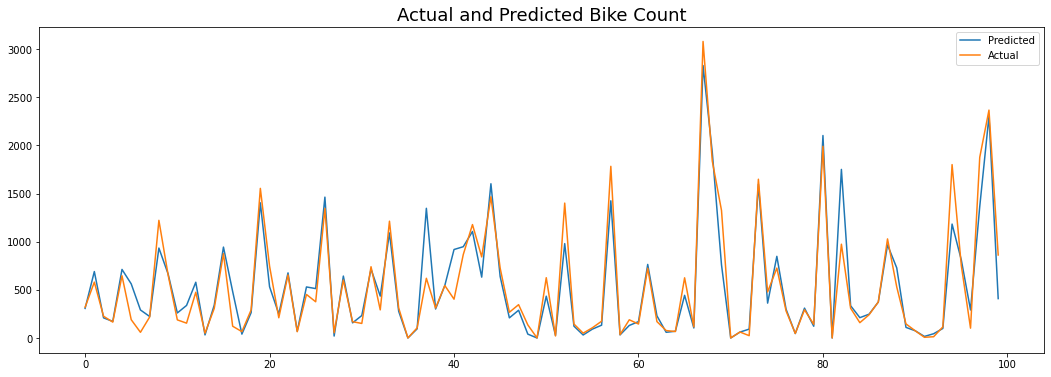

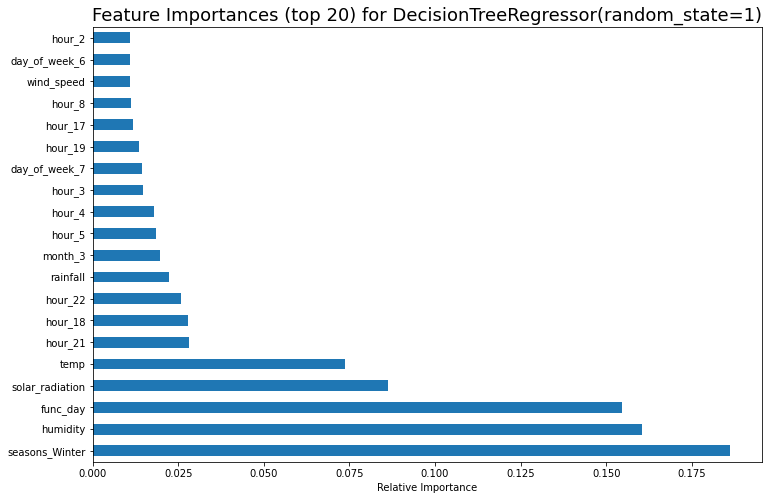

In [108]:
# Evaluation Metric Score chart
result = evaluate_model(dt, y_test,y_pred_dt1)
score['Decision tree'] = result

In [109]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88409.233813             88117.632092     190488.001771   
RMSE                201.738308               201.695838        292.623205   
MAE                 297.336903               296.846142        436.449312   
Train R2              0.783494                 0.784059          0.539891   
Test R2               0.788759                 0.789455          0.544856   
Adjusted R2           0.781522                 0.782243          0.529263   

             Lasso with alpha = 0.0001         Ridge  Ridge with alpha = 5  \
MSE                       88357.266319  88364.579984          88411.350260   
RMSE                        201.704182    201.717138            201.783427   
MAE                         297.249502    297.261804            297.340462   
Train R2                      0.783478      0.783463              0.783367   
Test R2                       0.788883      0.788865              0.788754   
Adjusted R2                   0.781650      0.781632              0.781517   

             Decision tree  
MSE           62661.716895  
RMSE            139.240868  
MAE             250.323225  
Train R2          1.000000  
Test R2           0.850279  
Adjusted R2       0.845150

#### 2. Cross- Validation & Hyperparameter Tuning

In [110]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

# Regressor
dt_model = DecisionTreeRegressor(random_state=1)

# HYperparameter Grid
grid = {'max_depth' : [8,10,12,14,16],
        'min_samples_split' : np.arange(35,50),
        'min_samples_leaf' : np.arange(22,31,2)}

# fitting model with hypertuned paramaters using grid search
dt_gridsearch = GridSearchCV(dt_model,
                             grid,
                             cv=6,
                             scoring= 'neg_root_mean_squared_error')
dt_gridsearch.fit(X_train,y_train)
dt_best_params = dt_gridsearch.best_params_

In [111]:
dt_best_params

{'max_depth': 16, 'min_samples_leaf': 22, 'min_samples_split': 35}

In [112]:
# building DT model with best parameters
dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'],
                                 min_samples_leaf=dt_best_params['min_samples_leaf'],
                                 min_samples_split=dt_best_params['min_samples_split'],
                                 random_state=1)

In [113]:
# fitting model
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=16, min_samples_leaf=22, min_samples_split=35,
                      random_state=1)

In [114]:
# dt test predictions
y_pred_dt = dt_model.predict(X_test)

MSE : 79813.0617090977
RMSE : 282.512055865051
MAE : 171.79919866982974
Train R2 : 0.8601120659820333
Test R2 : 0.8092980787396566
Adjusted R2 :  0.8027648764755693


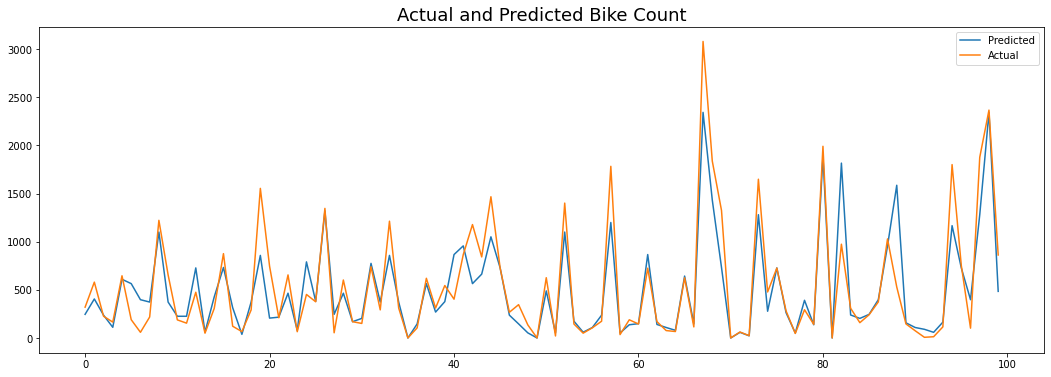

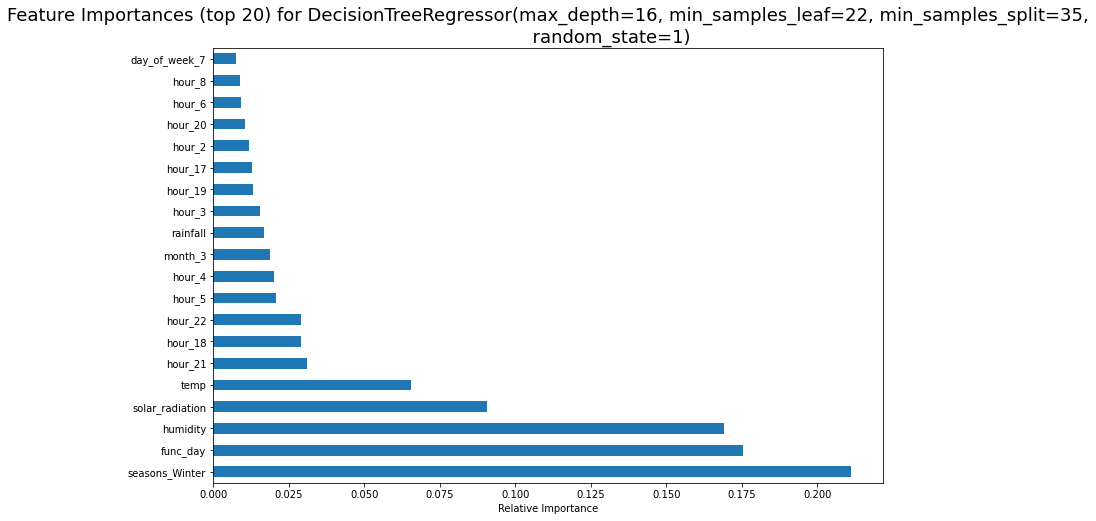

In [115]:
#Evaluation matrices for DecisionTree
result = evaluate_model(dt_model, y_test,y_pred_dt)
score['Decision tree tuned'] = result

In [116]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88409.233813             88117.632092     190488.001771   
RMSE                201.738308               201.695838        292.623205   
MAE                 297.336903               296.846142        436.449312   
Train R2              0.783494                 0.784059          0.539891   
Test R2               0.788759                 0.789455          0.544856   
Adjusted R2           0.781522                 0.782243          0.529263   

             Lasso with alpha = 0.0001         Ridge  Ridge with alpha = 5  \
MSE                       88357.266319  88364.579984          88411.350260   
RMSE                        201.704182    201.717138            201.783427   
MAE                         297.249502    297.261804            297.340462   
Train R2                      0.783478      0.783463              0.783367   
Test R2                       0.788883      0.788865              0.788754   
Adjusted R2                   0.781650      0.781632              0.781517   

             Decision tree  Decision tree tuned  
MSE           62661.716895         79813.061709  
RMSE            139.240868           171.799199  
MAE             250.323225           282.512056  
Train R2          1.000000             0.860112  
Test R2           0.850279             0.809298  
Adjusted R2       0.845150             0.802765

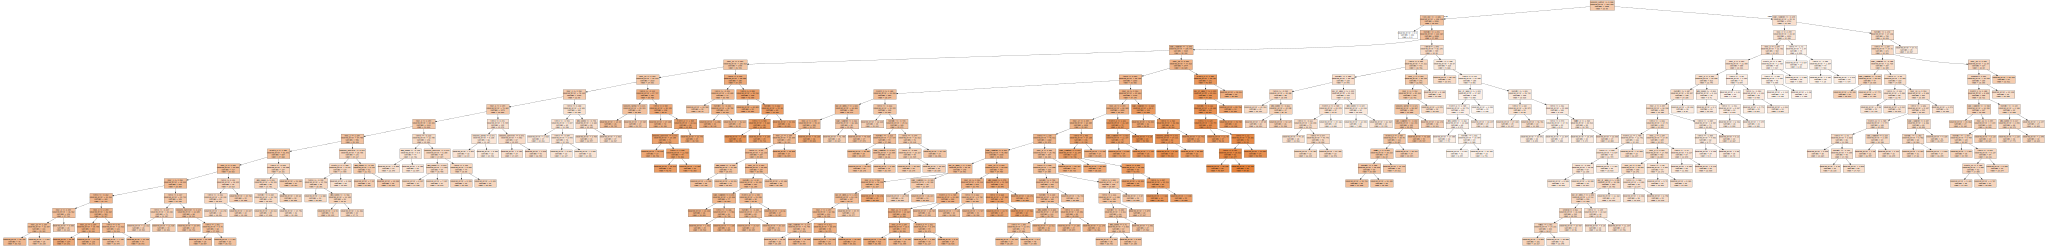

In [117]:
# Decision tree diagram
graph = Source(tree.export_graphviz(dt_model,
                                    out_file=None,
                                    feature_names=features,
                                    filled= True))
display(SVG(graph.pipe(format='svg')))

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 5 : Random Forest

In [118]:
# ML Model - 3 Implementation
rf = RandomForestRegressor(random_state=0)
# Fit the Algorithm
rf.fit(X_train,y_train)
# Predict on the model
y_pred_rf1 = rf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 37575.15580591792
RMSE : 193.8431216368482
MAE : 108.67624692802576
Train R2 : 0.9888532847499221
Test R2 : 0.9102195273505151
Adjusted R2 :  0.9071437639638228


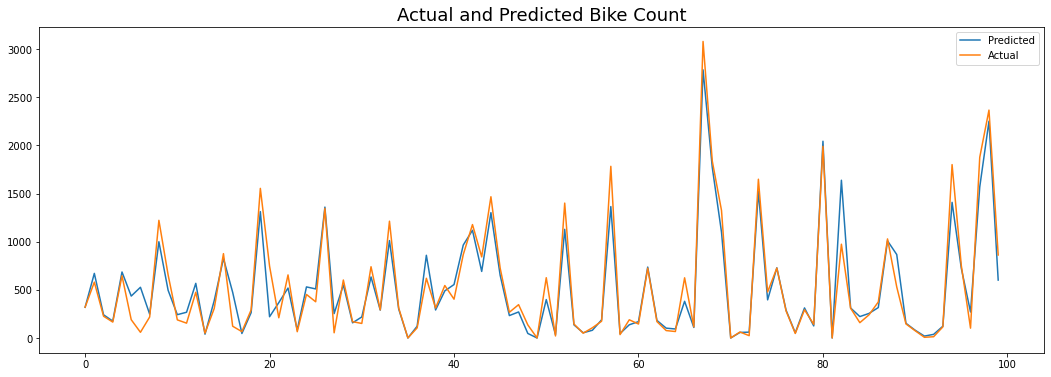

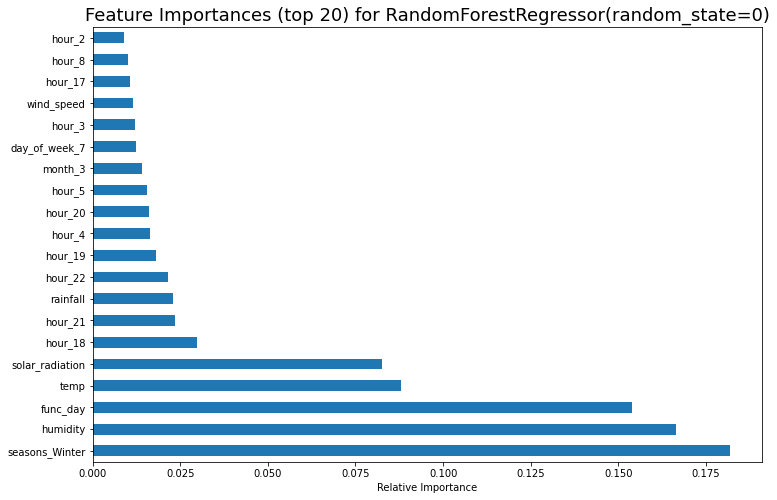

In [119]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(rf, y_test,y_pred_rf1)
score['Random forest'] = result

In [120]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88409.233813             88117.632092     190488.001771   
RMSE                201.738308               201.695838        292.623205   
MAE                 297.336903               296.846142        436.449312   
Train R2              0.783494                 0.784059          0.539891   
Test R2               0.788759                 0.789455          0.544856   
Adjusted R2           0.781522                 0.782243          0.529263   

             Lasso with alpha = 0.0001         Ridge  Ridge with alpha = 5  \
MSE                       88357.266319  88364.579984          88411.350260   
RMSE                        201.704182    201.717138            201.783427   
MAE                         297.249502    297.261804            297.340462   
Train R2                      0.783478      0.783463              0.783367   
Test R2                       0.788883      0.788865              0.788754   
Adjusted R2                   0.781650      0.781632              0.781517   

             Decision tree  Decision tree tuned  Random forest  
MSE           62661.716895         79813.061709   37575.155806  
RMSE            139.240868           171.799199     108.676247  
MAE             250.323225           282.512056     193.843122  
Train R2          1.000000             0.860112       0.988853  
Test R2           0.850279             0.809298       0.910220  
Adjusted R2       0.845150             0.802765       0.907144

#### 2. Cross- Validation & Hyperparameter Tuning

In [121]:
# random forest model
rf_model = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':[300],                    # limited due to computational power availability
             'min_samples_leaf':np.arange(20,25)}     # Approximate range after fitting a decision tree model

In [122]:
# fitting a rf model with best parameters obtained from gridsearch
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=6,scoring='neg_root_mean_squared_error')
rf_gridsearch.fit(X_train,y_train)
rf_best_params = rf_gridsearch.best_params_

In [123]:
# best parameters for random forests
rf_best_params

{'min_samples_leaf': 20, 'n_estimators': 300}

In [124]:
# Fitting RF model with best parameters
rf_model = RandomForestRegressor(n_estimators=rf_best_params['n_estimators'],
                                 min_samples_leaf=rf_best_params['min_samples_leaf'],
                                 random_state=0)

In [125]:
# fit
rf_model.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=20, n_estimators=300, random_state=0)

In [126]:
# rf predictions on test data
y_pred_rf = rf_model.predict(X_test)

MSE : 71459.96706302221
RMSE : 267.3199713134471
MAE : 160.5745059433242
Train R2 : 0.8685524211350605
Test R2 : 0.8292566063711622
Adjusted R2 :  0.8234071575640313


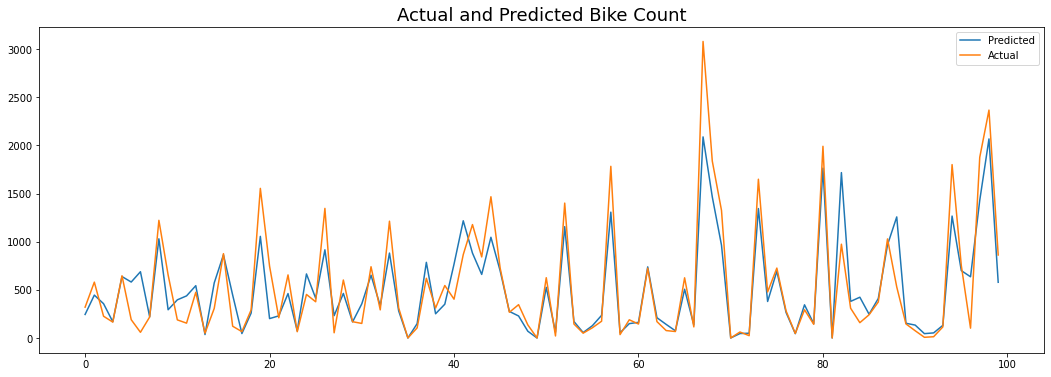

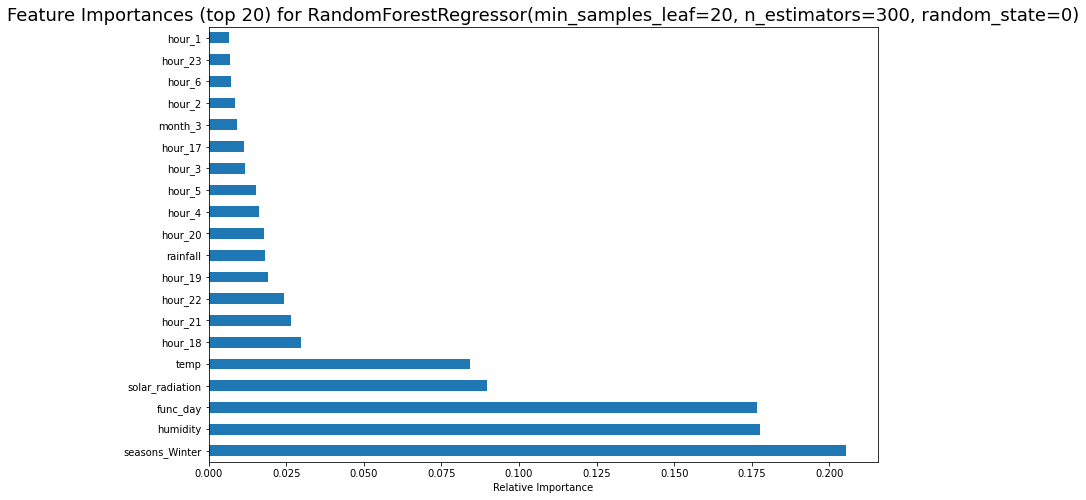

In [127]:
#Evaluation matrices for RandomForest 
result = evaluate_model(rf_model, y_test,y_pred_rf)
score['Random forest tuned'] = result

In [128]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88409.233813             88117.632092     190488.001771   
RMSE                201.738308               201.695838        292.623205   
MAE                 297.336903               296.846142        436.449312   
Train R2              0.783494                 0.784059          0.539891   
Test R2               0.788759                 0.789455          0.544856   
Adjusted R2           0.781522                 0.782243          0.529263   

             Lasso with alpha = 0.0001         Ridge  Ridge with alpha = 5  \
MSE                       88357.266319  88364.579984          88411.350260   
RMSE                        201.704182    201.717138            201.783427   
MAE                         297.249502    297.261804            297.340462   
Train R2                      0.783478      0.783463              0.783367   
Test R2                       0.788883      0.788865              0.788754   
Adjusted R2                   0.781650      0.781632              0.781517   

             Decision tree  Decision tree tuned  Random forest  \
MSE           62661.716895         79813.061709   37575.155806   
RMSE            139.240868           171.799199     108.676247   
MAE             250.323225           282.512056     193.843122   
Train R2          1.000000             0.860112       0.988853   
Test R2           0.850279             0.809298       0.910220   
Adjusted R2       0.845150             0.802765       0.907144   

             Random forest tuned  
MSE                 71459.967063  
RMSE                  160.574506  
MAE                   267.319971  
Train R2                0.868552  
Test R2                 0.829257  
Adjusted R2             0.823407

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 6 : Gradient Boosting Regressor

In [129]:
# ML Model - 3 Implementation
gb = GradientBoostingRegressor(random_state=0)
# Fit the Algorithm
gb.fit(X_train,y_train)
# Predict on the model
y_pred_gb1 = gb.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 75572.77418949897
RMSE : 274.905027581343
MAE : 182.48950930130843
Train R2 : 0.82676093922628
Test R2 : 0.8194296406590706
Adjusted R2 :  0.8132435326603855


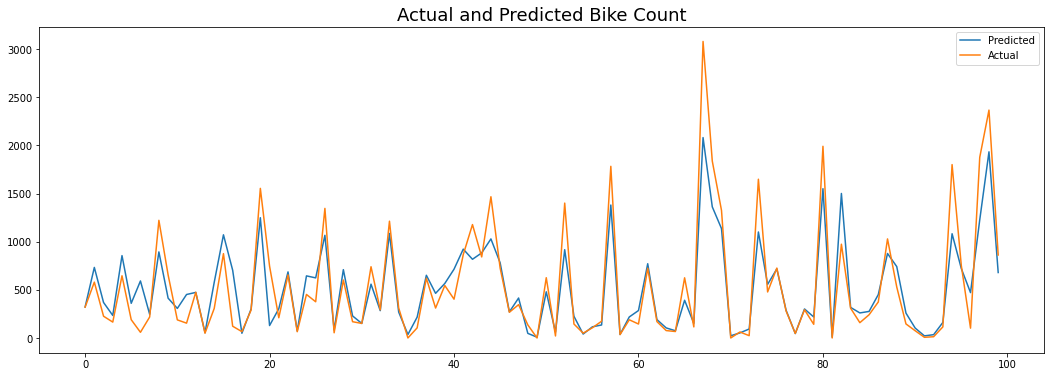

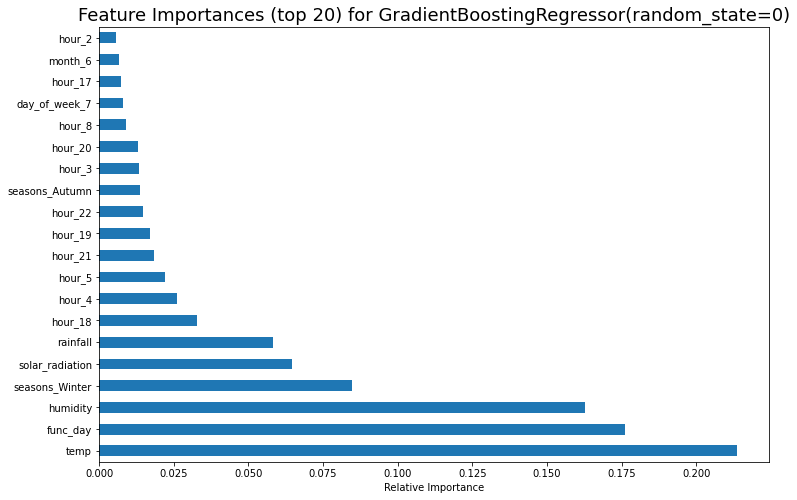

In [130]:
# Evaluation Metric Score chart
result = evaluate_model(gb, y_test,y_pred_gb1)
score['Gradient Boosting Regressor'] = result

In [131]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88409.233813             88117.632092     190488.001771   
RMSE                201.738308               201.695838        292.623205   
MAE                 297.336903               296.846142        436.449312   
Train R2              0.783494                 0.784059          0.539891   
Test R2               0.788759                 0.789455          0.544856   
Adjusted R2           0.781522                 0.782243          0.529263   

             Lasso with alpha = 0.0001         Ridge  Ridge with alpha = 5  \
MSE                       88357.266319  88364.579984          88411.350260   
RMSE                        201.704182    201.717138            201.783427   
MAE                         297.249502    297.261804            297.340462   
Train R2                      0.783478      0.783463              0.783367   
Test R2                       0.788883      0.788865              0.788754   
Adjusted R2                   0.781650      0.781632              0.781517   

             Decision tree  Decision tree tuned  Random forest  \
MSE           62661.716895         79813.061709   37575.155806   
RMSE            139.240868           171.799199     108.676247   
MAE             250.323225           282.512056     193.843122   
Train R2          1.000000             0.860112       0.988853   
Test R2           0.850279             0.809298       0.910220   
Adjusted R2       0.845150             0.802765       0.907144   

             Random forest tuned  Gradient Boosting Regressor  
MSE                 71459.967063                 75572.774189  
RMSE                  160.574506                   182.489509  
MAE                   267.319971                   274.905028  
Train R2                0.868552                     0.826761  
Test R2                 0.829257                     0.819430  
Adjusted R2             0.823407                     0.813244

#### 2. Cross- Validation & Hyperparameter Tuning

In [132]:
# GBM model
gb_model = GradientBoostingRegressor(random_state=0)
gb_params = {'n_estimators':[300],
             'min_samples_leaf':np.arange(20,24),
             'max_depth':np.arange(14,17)
             }

In [133]:
# Perform the randomized search
random_search = RandomizedSearchCV(gb_model, param_distributions=gb_params, cv=6, n_iter=20, scoring='neg_root_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)

gb_best_params = random_search.best_params_

In [134]:
# GBM best parameters
gb_best_params

{'n_estimators': 300, 'min_samples_leaf': 23, 'max_depth': 14}

In [135]:
# Building GBM model with best parameters
gb_model = GradientBoostingRegressor(n_estimators=gb_best_params['n_estimators'],
                                     min_samples_leaf=gb_best_params['min_samples_leaf'],
                                     max_depth = gb_best_params['max_depth'],
                                     random_state=0)

In [136]:
# fit
gb_model.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=14, min_samples_leaf=23, n_estimators=300,
                          random_state=0)

In [137]:
# gradient boosting test predictions
y_pred_gb = gb_model.predict(X_test)

MSE : 27067.890542390174
RMSE : 164.52322189402375
MAE : 94.95686306285712
Train R2 : 0.9939607507228254
Test R2 : 0.9353251382622991
Adjusted R2 :  0.9331094607780779


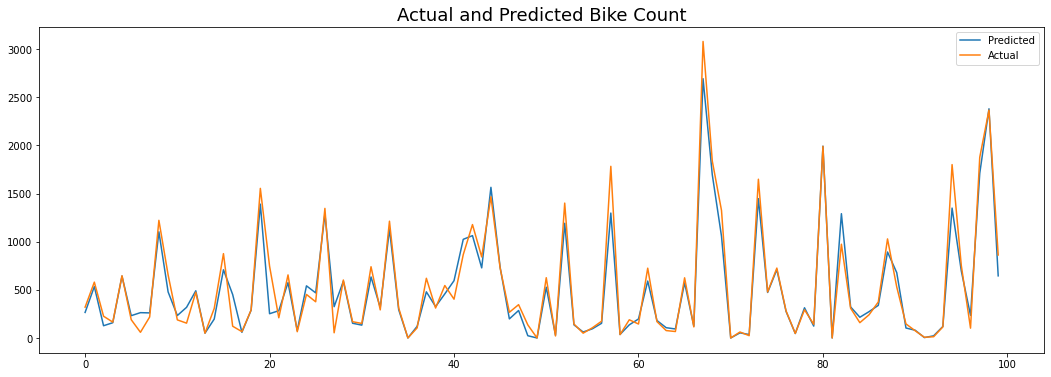

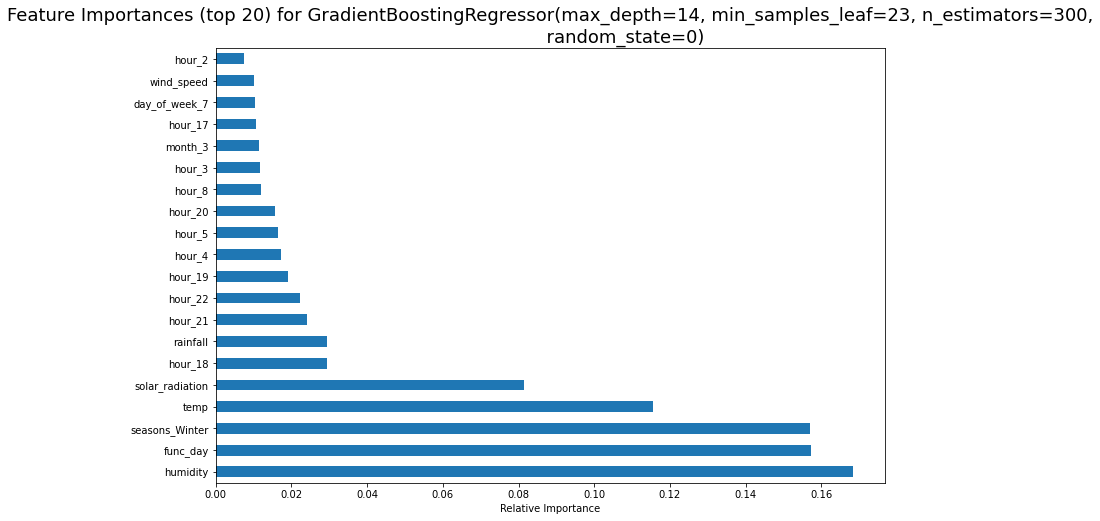

In [138]:
#Evaluation matrices for GradientBoosting
result = evaluate_model(gb_model, y_test,y_pred_gb)
score['Gradient Boosting Regressor Tuned'] = result

In [139]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88409.233813             88117.632092     190488.001771   
RMSE                201.738308               201.695838        292.623205   
MAE                 297.336903               296.846142        436.449312   
Train R2              0.783494                 0.784059          0.539891   
Test R2               0.788759                 0.789455          0.544856   
Adjusted R2           0.781522                 0.782243          0.529263   

             Lasso with alpha = 0.0001         Ridge  Ridge with alpha = 5  \
MSE                       88357.266319  88364.579984          88411.350260   
RMSE                        201.704182    201.717138            201.783427   
MAE                         297.249502    297.261804            297.340462   
Train R2                      0.783478      0.783463              0.783367   
Test R2                       0.788883      0.788865              0.788754   
Adjusted R2                   0.781650      0.781632              0.781517   

             Decision tree  Decision tree tuned  Random forest  \
MSE           62661.716895         79813.061709   37575.155806   
RMSE            139.240868           171.799199     108.676247   
MAE             250.323225           282.512056     193.843122   
Train R2          1.000000             0.860112       0.988853   
Test R2           0.850279             0.809298       0.910220   
Adjusted R2       0.845150             0.802765       0.907144   

             Random forest tuned  Gradient Boosting Regressor  \
MSE                 71459.967063                 75572.774189   
RMSE                  160.574506                   182.489509   
MAE                   267.319971                   274.905028   
Train R2                0.868552                     0.826761   
Test R2                 0.829257                     0.819430   
Adjusted R2             0.823407                     0.813244   

             Gradient Boosting Regressor Tuned  
MSE                               27067.890542  
RMSE                                 94.956863  
MAE                                 164.523222  
Train R2                              0.993961  
Test R2                               0.935325  
Adjusted R2                           0.933109

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 7 : Xtreme Gradient Boosting Regressor

In [140]:
#import XGBRegressor
from xgboost import XGBRegressor
# ML Model - 3 Implementation
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')
# Fit the Algorithm
xgb_model.fit(X_train,y_train)
# Predict on the model
y_pred_xgb1 = xgb_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 74135.03532779365
RMSE : 272.2774969177469
MAE : 180.9347858740731
Train R2 : 0.8290288765277363
Test R2 : 0.8228649124971213
Adjusted R2 :  0.8167964924881628


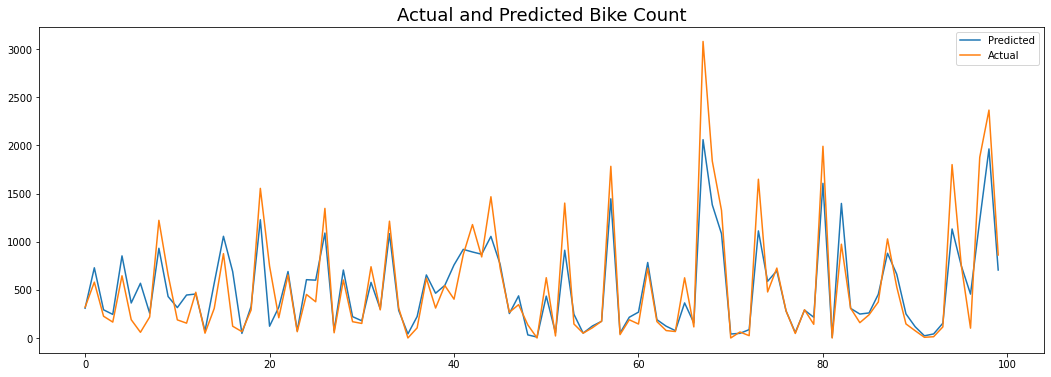

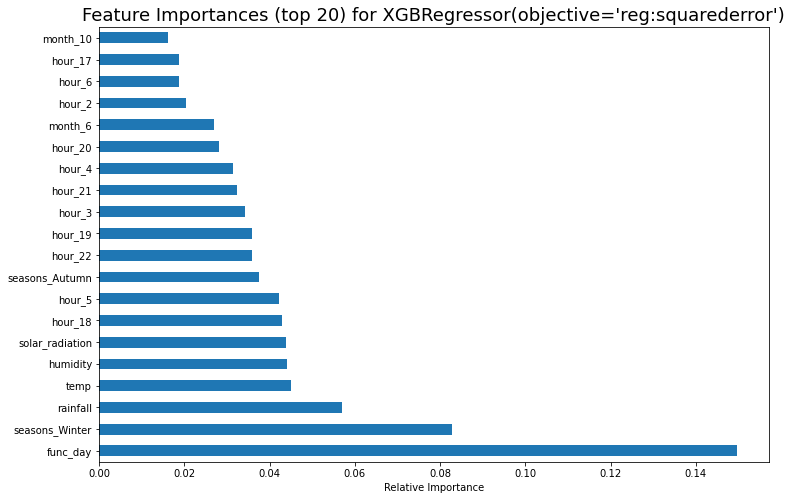

In [141]:
# Evaluation Metric Score chart
result = evaluate_model(xgb_model, y_test,y_pred_xgb1)
score['Xtreme Gradient Boosting Regressor'] = result

In [142]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88409.233813             88117.632092     190488.001771   
RMSE                201.738308               201.695838        292.623205   
MAE                 297.336903               296.846142        436.449312   
Train R2              0.783494                 0.784059          0.539891   
Test R2               0.788759                 0.789455          0.544856   
Adjusted R2           0.781522                 0.782243          0.529263   

             Lasso with alpha = 0.0001         Ridge  Ridge with alpha = 5  \
MSE                       88357.266319  88364.579984          88411.350260   
RMSE                        201.704182    201.717138            201.783427   
MAE                         297.249502    297.261804            297.340462   
Train R2                      0.783478      0.783463              0.783367   
Test R2                       0.788883      0.788865              0.788754   
Adjusted R2                   0.781650      0.781632              0.781517   

             Decision tree  Decision tree tuned  Random forest  \
MSE           62661.716895         79813.061709   37575.155806   
RMSE            139.240868           171.799199     108.676247   
MAE             250.323225           282.512056     193.843122   
Train R2          1.000000             0.860112       0.988853   
Test R2           0.850279             0.809298       0.910220   
Adjusted R2       0.845150             0.802765       0.907144   

             Random forest tuned  Gradient Boosting Regressor  \
MSE                 71459.967063                 75572.774189   
RMSE                  160.574506                   182.489509   
MAE                   267.319971                   274.905028   
Train R2                0.868552                     0.826761   
Test R2                 0.829257                     0.819430   
Adjusted R2             0.823407                     0.813244   

             Gradient Boosting Regressor Tuned  \
MSE                               27067.890542   
RMSE                                 94.956863   
MAE                                 164.523222   
Train R2                              0.993961   
Test R2                               0.935325   
Adjusted R2                           0.933109   

             Xtreme Gradient Boosting Regressor  
MSE                                74135.035328  
RMSE                                 180.934786  
MAE                                  272.277497  
Train R2                               0.829029  
Test R2                                0.822865  
Adjusted R2                            0.816796

#### 2. Cross- Validation & Hyperparameter Tuning

In [143]:
#import XGBRegressor
from xgboost import XGBRegressor
# xg boost
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')
xgb_params = {'n_estimators':[500],
             'min_samples_leaf':np.arange(20,22)}

In [144]:
# finding best parameters
xgb_search = RandomizedSearchCV(xgb_model,xgb_params,cv=6,scoring='neg_root_mean_squared_error',n_iter=100, n_jobs=-1)
xgb_search.fit(X_train,y_train)
xgb_best_params = xgb_search.best_params_

In [145]:
# xg boost best parameters
xgb_best_params

{'n_estimators': 500, 'min_samples_leaf': 20}

In [146]:
# Building a XG boost model with best parameters
xgb_model = xgb.XGBRegressor(n_estimators=xgb_best_params['n_estimators'],
                             min_samples_leaf=xgb_best_params['min_samples_leaf'],
                             random_state=0)

In [147]:
# fit
xgb_model.fit(X_train,y_train)

[15:11:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(min_samples_leaf=20, n_estimators=500)

In [148]:
# xtreme gradient boosting test predictions
y_pred_xgb = xgb_model.predict(X_test)

MSE : 39003.128944689975
RMSE : 197.49209843608926
MAE : 123.79157865248624
Train R2 : 0.9299555815783516
Test R2 : 0.9068075893137997
Adjusted R2 :  0.9036149373233687


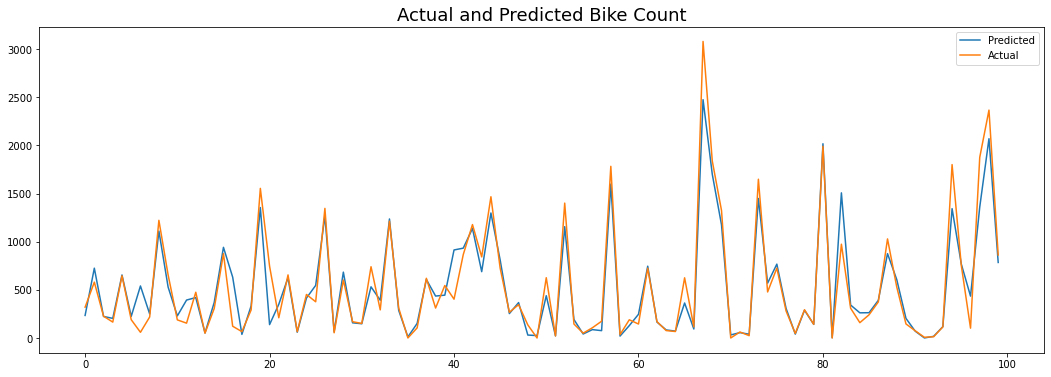

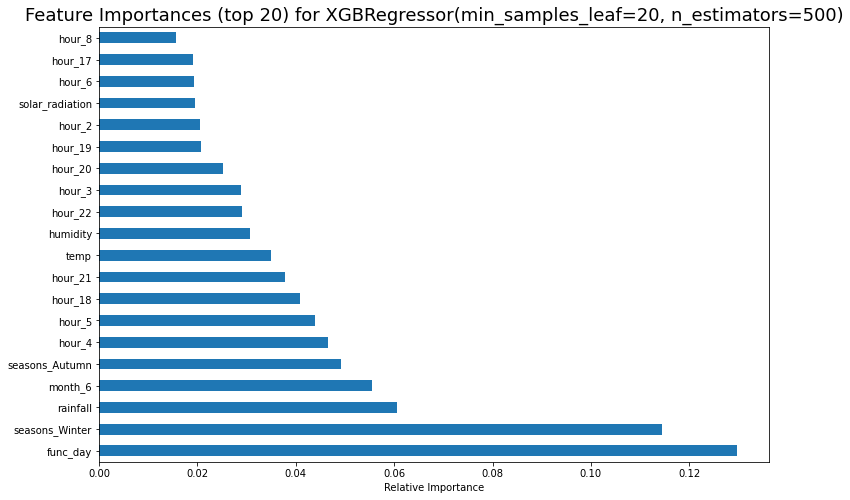

In [149]:
#Evaluation matrices for XGBRegressor 
result = evaluate_model(xgb_model, y_test,y_pred_xgb)
score['Xtreme Gradient Boosting Regressor Tuned'] = result

In [150]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88409.233813             88117.632092     190488.001771   
RMSE                201.738308               201.695838        292.623205   
MAE                 297.336903               296.846142        436.449312   
Train R2              0.783494                 0.784059          0.539891   
Test R2               0.788759                 0.789455          0.544856   
Adjusted R2           0.781522                 0.782243          0.529263   

             Lasso with alpha = 0.0001         Ridge  Ridge with alpha = 5  \
MSE                       88357.266319  88364.579984          88411.350260   
RMSE                        201.704182    201.717138            201.783427   
MAE                         297.249502    297.261804            297.340462   
Train R2                      0.783478      0.783463              0.783367   
Test R2                       0.788883      0.788865              0.788754   
Adjusted R2                   0.781650      0.781632              0.781517   

             Decision tree  Decision tree tuned  Random forest  \
MSE           62661.716895         79813.061709   37575.155806   
RMSE            139.240868           171.799199     108.676247   
MAE             250.323225           282.512056     193.843122   
Train R2          1.000000             0.860112       0.988853   
Test R2           0.850279             0.809298       0.910220   
Adjusted R2       0.845150             0.802765       0.907144   

             Random forest tuned  Gradient Boosting Regressor  \
MSE                 71459.967063                 75572.774189   
RMSE                  160.574506                   182.489509   
MAE                   267.319971                   274.905028   
Train R2                0.868552                     0.826761   
Test R2                 0.829257                     0.819430   
Adjusted R2             0.823407                     0.813244   

             Gradient Boosting Regressor Tuned  \
MSE                               27067.890542   
RMSE                                 94.956863   
MAE                                 164.523222   
Train R2                              0.993961   
Test R2                               0.935325   
Adjusted R2                           0.933109   

             Xtreme Gradient Boosting Regressor  \
MSE                                74135.035328   
RMSE                                 180.934786   
MAE                                  272.277497   
Train R2                               0.829029   
Test R2                                0.822865   
Adjusted R2                            0.816796   

             Xtreme Gradient Boosting Regressor Tuned  
MSE                                      39003.128945  
RMSE                                       123.791579  
MAE                                        197.492098  
Train R2                                     0.929956  
Test R2                                      0.906808  
Adjusted R2                                  0.903615

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### Plot R2 scores for each model

In [151]:
score.columns

Index(['Linear regression', 'Linear regression tuned', 'Lasso regression',
       'Lasso with alpha = 0.0001', 'Ridge', 'Ridge with alpha = 5',
       'Decision tree', 'Decision tree tuned', 'Random forest',
       'Random forest tuned', 'Gradient Boosting Regressor',
       'Gradient Boosting Regressor Tuned',
       'Xtreme Gradient Boosting Regressor',
       'Xtreme Gradient Boosting Regressor Tuned'],
      dtype='object')

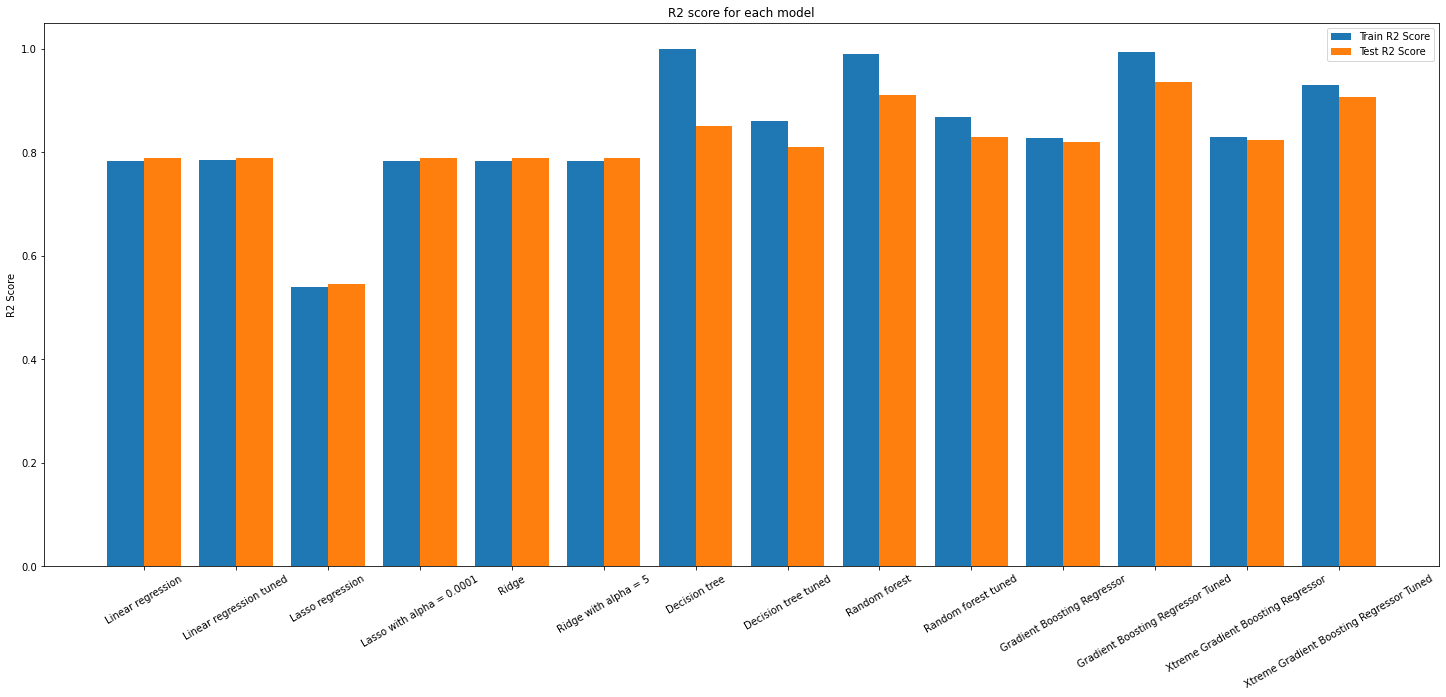

In [152]:
# R2 Scores plot

models = list(score.columns)
train = score.iloc[-3,:]
test = score.iloc[-2,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(25,10))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train R2 Score')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test R2 Score')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("R2 Score")
plt.title("R2 score for each model")
plt.legend()
plt.show()

### Plot of adjusted R2 score

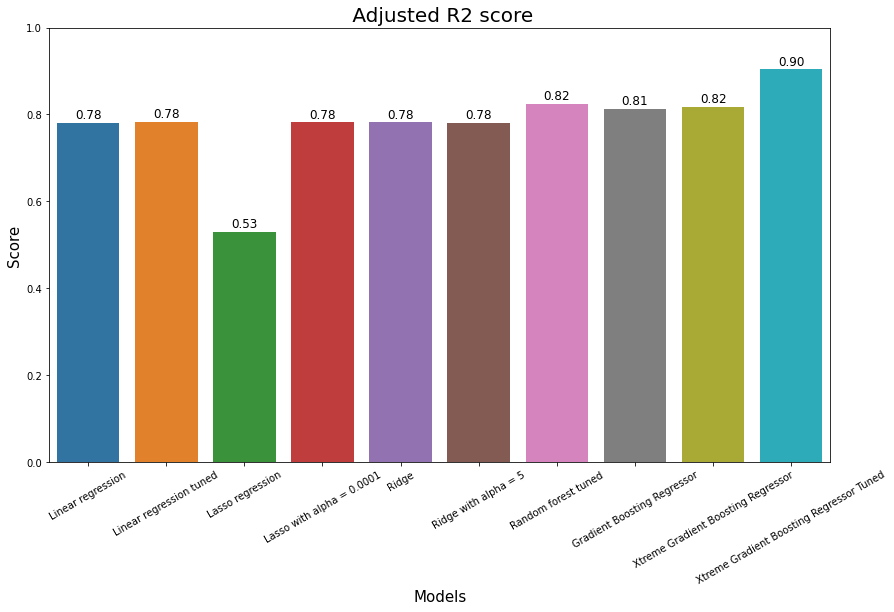

In [153]:
# Removing the overfitted models which have more than 5% gap between train and test values
score_t = score.transpose()            #taking transpose of the score dataframe to create new difference column
score_t['diff']=score_t['Train R2']-score_t['Test R2']                   #creating new column diff of train R2 and test R2 score
remove_models = list(score_t[score_t['diff']>=.05].index)                #creating a list of models which have difference more than .05 that is 5%
remove_models

adj = score_t['Adjusted R2'].drop(remove_models)                     #creating a new dataframe with required models and adjusted r2 score

plt.figure(figsize=(14,8))
plots = sns.barplot(x=list(adj.index), y=adj)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=30)

plt.title(" Adjusted R2 score", fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
# Setting limit of the y axis from 0 to 30
plt.ylim(0,1)
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## **SHAP(Shapley additive Explanations)**

In [154]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 11.7 MB/s eta 0:00:00


In [155]:
# importing shap
import shap 

In [156]:
#Shap explainer for xgb (tree based)
explainer = shap.TreeExplainer(xgb_model, X_train, feature_names=features)

In [157]:
shap.initjs()

# select an instance from the test set
instance = X_test[50, :]

# compute the SHAP values for the instance
shap_values = explainer(instance)

# create the SHAP force plot
shap.plots.force(shap_values)

In [158]:
# get shap values of test data
shap_values = explainer(X_test)

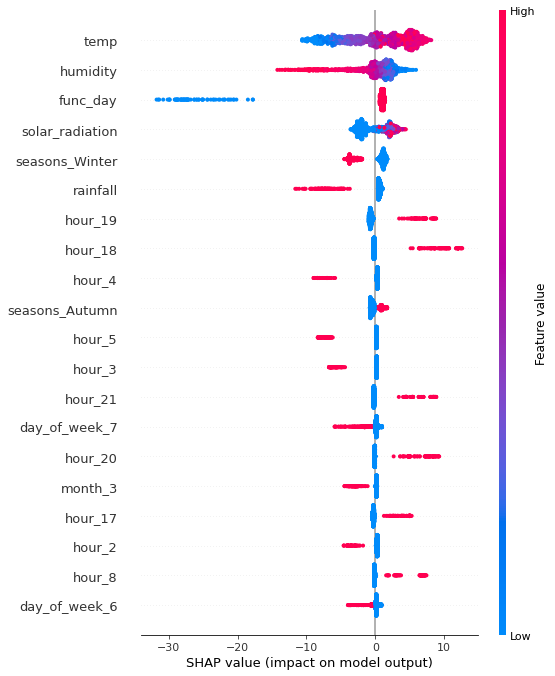

In [159]:
shap.summary_plot(shap_values, X_test)

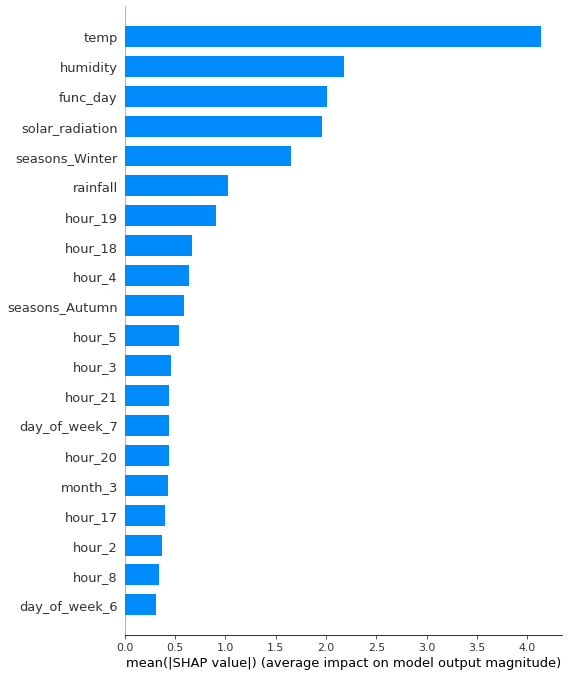

In [160]:
# Obtain a Bar Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

## **Eli5**

In [161]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 12.9 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=fe73b826947e8fb15c59b073eda7cad86118b1b55d4b444698355f4298431027
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

In [162]:
#import eli5
import eli5


In [163]:
# explain the predictions of the regressor
explainer = eli5.explain_prediction_xgboost(xgb_model, X_test[50, :], feature_names=features)
print(explainer)

Explanation(estimator='XGBRegressor(min_samples_leaf=20, n_estimators=500)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not cha

In [164]:
print('''Explanation(estimator='XGBRegressor(min_samples_leaf=20, n_estimators=500)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=23.05014098861168, std=None, value=1.0), FeatureWeight(feature='month_11', weight=3.7761880847701566, std=None, value=3.3416562759605704), FeatureWeight(feature='hour_0', weight=0.6622024926953779, std=None, value=4.79583152331272), FeatureWeight(feature='func_day', weight=0.533529179162446, std=None, value=0.18667988589875736), FeatureWeight(feature='hour_4', weight=0.47206342966103687, std=None, value=-0.20851441405707474), FeatureWeight(feature='hour_5', weight=0.41216657207973467, std=None, value=-0.20851441405707474), FeatureWeight(feature='hour_3', weight=0.23827207257821023, std=None, value=-0.20851441405707474), FeatureWeight(feature='rainfall', weight=0.22994753562788242, std=None, value=-0.2532586458365481), FeatureWeight(feature='hour_2', weight=0.15785103985860424, std=None, value=-0.20851441405707474), FeatureWeight(feature='hour_6', weight=0.14345767278841826, std=None, value=-0.20851441405707474), FeatureWeight(feature='hour_10', weight=0.13724666619068412, std=None, value=-0.20851441405707474), FeatureWeight(feature='month_2', weight=0.12944089097833564, std=None, value=-0.2882465150048877), FeatureWeight(feature='holiday', weight=0.12468608901559826, std=None, value=-0.227756885400337), FeatureWeight(feature='month_1', weight=0.12179275952494291, std=None, value=-0.30465451130335336), FeatureWeight(feature='hour_11', weight=0.10596047446616198, std=None, value=-0.20851441405707474), FeatureWeight(feature='month_3', weight=0.1043707048493309, std=None, value=-0.30465451130335336), FeatureWeight(feature='day_of_week_7', weight=0.09472642874536247, std=None, value=-0.40759561492184176), FeatureWeight(feature='month_8', weight=0.07820965788739848, std=None, value=-0.30465451130335336), FeatureWeight(feature='snowfall', weight=0.055223598909253296, std=None, value=-0.23079081052007291), FeatureWeight(feature='hour_1', weight=0.045126804902806746, std=None, value=-0.20851441405707474), FeatureWeight(feature='day_of_week_1', weight=0.04182289516048317, std=None, value=-0.40759561492184176), FeatureWeight(feature='hour_12', weight=0.04162316557488435, std=None, value=-0.20851441405707474), FeatureWeight(feature='hour_13', weight=0.04144528776093169, std=None, value=-0.20851441405707474), FeatureWeight(feature='hour_14', weight=0.030436448719513374, std=None, value=-0.20851441405707474), FeatureWeight(feature='day_of_week_2', weight=0.017817730572747537, std=None, value=-0.40759561492184176), FeatureWeight(feature='hour_15', weight=0.01587176887798606, std=None, value=-0.20851441405707474)], neg=[FeatureWeight(feature='temp', weight=-2.887841782705233, std=None, value=-0.5094006556456484), FeatureWeight(feature='solar_radiation', weight=-2.0574262151846363, std=None, value=-0.6551317164805701), FeatureWeight(feature='humidity', weight=-0.9661207629282033, std=None, value=0.8729200512228672), FeatureWeight(feature='hour_21', weight=-0.41319716639447346, std=None, value=-0.20851441405707474), FeatureWeight(feature='hour_22', weight=-0.39850435950747026, std=None, value=-0.20851441405707474), FeatureWeight(feature='day_of_week_6', weight=-0.3789514617095185, std=None, value=2.453412066741086), FeatureWeight(feature='visibility_2', weight=-0.3675989228790272, std=None, value=-1.6377482773382297), FeatureWeight(feature='hour_18', weight=-0.3508770958617176, std=None, value=-0.20851441405707474), FeatureWeight(feature='month_10', weight=-0.3128378692853542, std=None, value=-0.30465451130335336), FeatureWeight(feature='hour_8', weight=-0.3054557039755982, std=None, value=-0.20851441405707474), FeatureWeight(feature='hour_19', weight=-0.3020856088437685, std=None, value=-0.20851441405707474), FeatureWeight(feature='hour_20', weight=-0.2533420993028547, std=None, value=-0.20851441405707474), FeatureWeight(feature='hour_17', weight=-0.1841486706354311, std=None, value=-0.20851441405707474), FeatureWeight(feature='month_6', weight=-0.17858311317698988, std=None, value=-0.29925280083228983), FeatureWeight(feature='wind_speed', weight=-0.11065179684821538, std=None, value=0.3619731137164263), FeatureWeight(feature='month_5', weight=-0.10344104944543853, std=None, value=-0.30465451130335336), FeatureWeight(feature='hour_23', weight=-0.09527124906776988, std=None, value=-0.20851441405707474), FeatureWeight(feature='day_of_week_5', weight=-0.08543719764473455, std=None, value=-0.41215506168406424), FeatureWeight(feature='hour_7', weight=-0.06056970649100605, std=None, value=-0.20851441405707474), FeatureWeight(feature='hour_16', weight=-0.04865404925521802, std=None, value=-0.20851441405707474), FeatureWeight(feature='visibility_1', weight=-0.03662746179456077, std=None, value=2.09938262529902), FeatureWeight(feature='visibility_0', weight=-0.03136790676027211, std=None, value=-0.30799860731379386), FeatureWeight(feature='month_7', weight=-0.031232376628361862, std=None, value=-0.30465451130335336), FeatureWeight(feature='day_of_week_3', weight=-0.02671734714329242, std=None, value=-0.40759561492184176), FeatureWeight(feature='month_9', weight=-0.021872911323057694, std=None, value=-0.29925280083228983), FeatureWeight(feature='hour_9', weight=-0.013697684273526196, std=None, value=-0.20851441405707474), FeatureWeight(feature='day_of_week_4', weight=-0.0037612913326285596, std=None, value=-0.40759561492184176), FeatureWeight(feature='month_4', weight=-0.000644260394808313, std=None, value=-0.29925280083228983)], pos_remaining=0, neg_remaining=0), proba=None, score=20.834703319176782, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)''')

Explanation(estimator='XGBRegressor(min_samples_leaf=20, n_estimators=500)', description='
Features with largest coefficients.

Feature weights are calculated by following decision paths in trees
of an ensemble. Each leaf has an output score, and expected scores can also be
assigned to parent nodes. Contribution of one feature on the decision path
is how much expected score changes from parent to child. Weights of all 
features sum to the output score of the estimator.

Caveats:
1. Feature weights just show if the feature contributed positively or
   negatively to the final score, and does not show how increasing or
   decreasing the feature value will change the prediction.
2. In some cases, feature weight can be close to zero for an important feature.
   For example, in a single tree that computes XOR function, the feature at the
   top of the tree will have zero weight because expected scores for both
   branches are equal, so decision at the top feature does not change the
   expec

In [165]:
eli5.show_prediction(xgb_model, X_test[50, :], show_feature_values=True, feature_names=features)

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [166]:
# Import pickle
import pickle

# Save the best model (XGB)
pickle.dump(xgb_model, open('xgbmodel.pkl', 'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [167]:
# Load the File and predict unseen data.
pickled_model = pickle.load(open('xgbmodel.pkl', 'rb'))

# create a list for the x test value for the 50 index row
predict_new = list(instance)

# Testing on one instance which we used for shap X_test[50,:]
pickled_model.predict(predict_new)


[15:12:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([20.955704], dtype=float32)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***